
1. **Submuestreo (Undersampling):** reducir la cantidad de imágenes de las clases con más imágenes hasta que estén dentro del rango deseado. Para hacerlo de manera equitativa, puedes seleccionar al azar un conjunto de imágenes de cada clase para igualar el número.



##**PARTE A:**

#1. **Carga de datos y EDA:**
   - Se cargaron los datos en un formato adecuado para trabajar con ellos. utilizando la biblioteca de Pandas para generar un dataframe con todas las etiquetas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# Crea una lista para almacenar todos los DataFrames
etiquetas = []

# Lista de nombres de archivo CSV

Decor_electro_mueble = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Decoración,electrodomésticos,muebles/Decoración,electrodomésticos,muebles.csv'

juguetes = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Toallas, Ropa de Cama, Juguetes y juegos de mesa/juguetes.csv'
toallas = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Toallas, Ropa de Cama, Juguetes y juegos de mesa/toallas.csv'
juegos_de_mesa = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Toallas, Ropa de Cama, Juguetes y juegos de mesa/juegos_de_mesa.csv'

papeleria = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/papeleria/papeleria.csv'
cubiertos_ollas = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/cubiertos,ollas/cubiertos,ollas.csv'

Electro_Entretenimiento = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Entretenimiento, jardin, baño/Electronica de Entretenimiento/Electronica de Entretenimiento.csv'
Jardin = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Entretenimiento, jardin, baño/Articulos de Jardin/Articulos de Jardin.csv'
bano = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Entretenimiento, jardin, baño/Articulos de bano/Articulos de bano.csv'

Ropa = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/ropa y calzado, productos de limpieza, herramientas/ropa y calzado/labels_my-project-name_2023-10-19-10-30-49 (2).csv'
Limpieza = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/ropa y calzado, productos de limpieza, herramientas/productos de limpieza/labels_my-project-name_2023-10-20-12-35-12.csv'
Herramientas = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/ropa y calzado, productos de limpieza, herramientas/herramientas/labels_my-project-name_2023-10-19-11-45-24 (1).csv'


file_list = [Decor_electro_mueble,
             juguetes, toallas,
             juegos_de_mesa,
             papeleria,
             cubiertos_ollas,
             Electro_Entretenimiento,
             Jardin,
             bano,
             Ropa,
             Limpieza,
             Herramientas]

for filename in file_list:
    df = pd.read_csv(filename)
    etiquetas.append(df)

# Combina los DataFrames en uno solo
etiquetas = pd.concat(etiquetas, ignore_index=True)


In [ ]:
etiquetas

label_name  bbox_x  bbox_y  bbox_width  bbox_height  \
0          Muebles       9     226         546          321   
1          Muebles      63     199         619          294   
2          Muebles      18      68         600          434   
3          Muebles     121     188         813          359   
4          Muebles     168     363         868          439   
...            ...     ...     ...         ...          ...   
2208  herramientas       7      46         293          246   
2209  herramientas      35      61         242          205   
2210  herramientas      63       0         163          297   
2211  herramientas       0      82         300          127   
2212  herramientas       3      46         288          218   

                                image_name  image_width  image_height  
0          00513219-o_d26433f7_600x600.jpg          600           600  
1     0fd6da92c8360d87a5962857c87b8644.jpg          736           551  
2                              1111-1.jpeg          659           604  
3                        15-02-17RG975.jpg         1074           692  
4                         16018787-1_1.jpg         1200          1200  
...                                    ...          ...           ...  
2208                    180387-300-300.jpg          300           300  
2209                    187259-300-300.jpg          300           300  
2210                    187557-300-300.jpg          300           300  
2211                    190460-300-300.jpg          300           300  
2212                    190469-300-300.jpg          300           300  

[2213 rows x 8 columns]

In [ ]:
# Importar pandas
import pandas as pd


# Agrupar el dataframe por label_name
g = etiquetas.groupby("label_name")

# Obtener el número mínimo y máximo de imágenes por categoría
minimo = g.size().min()
maximo = g.size().max()

# Crear una lista vacía para guardar las muestras
muestras = []

# Iterar por cada grupo
for nombre, grupo in g:
    # Obtener una muestra aleatoria del tamaño deseado
    muestra = grupo.sample(n=min(maximo, 66), replace=False)
    # Añadir la muestra a la lista
    muestras.append(muestra)

# Concatenar la lista de muestras en un solo dataframe
df_balanceado = pd.concat(muestras, axis=0)


In [ ]:
df_balanceado

label_name  bbox_x  bbox_y  bbox_width  bbox_height  \
1562  Articulos de Jardin     351       9          79          427   
1453  Articulos de Jardin     261     515          84           79   
1526  Articulos de Jardin       4     145         241          269   
1488  Articulos de Jardin       0     409         228          333   
1475  Articulos de Jardin      99      43          47          162   
...                   ...     ...     ...         ...          ...   
2029       ropa y calzado       5      38         398          466   
2045       ropa y calzado       8       0         211          285   
2021       ropa y calzado      41      60         359          426   
2055       ropa y calzado      20      82         367          390   
2041       ropa y calzado       0      18         215          258   

                                             image_name  image_width  \
1562                        Articulos de Jardin (8).jpg          449   
1453                      Articulos de Jardin (16).webp          800   
1526                       Articulos de Jardin (30).jpg          695   
1488                       Articulos de Jardin (24).jpg         1001   
1475                       Articulos de Jardin (2).jpeg          612   
...                                                 ...          ...   
2029  168009065999125a084ecf3db07b88f301038127ca_thu...          405   
2045  1670637272d6b0d18f5ae5ba4529d4014feb84f7dc_thu...          219   
2021  1672109617b870212e564c7295878a9d33608b60d4_thu...          405   
2055  1648690883c0a1513a3e5331384704d7ee4e3e83cc_thu...          405   
2041  1661150085c0b16499b39186316be025a88b5e725c_thu...          219   

      image_height  
1562           450  
1453           800  
1526           520  
1488          1001  
1475           612  
...            ...  
2029           539  
2045           293  
2021           539  
2055           539  
2041           293  

[1056 rows x 8 columns]

- En conjunto se tienen **2212** etiquetas para un total de **1000** fotos, esto debido a que una foto puede contener más de una etiqueta.

## **Estandarizado y recortado de las imágenes**

La función `cargar_y_recortar_fotos` toma como entrada etiquetas, directorios de imágenes, ancho y alto deseados. Itera a través de los archivos en los directorios de imágenes, carga cada imagen, verifica las coordenadas de recorte y las dimensiones válidas, y luego recorta y redimensiona las imágenes según los parámetros especificados. Las imágenes recortadas se almacenan en una matriz junto con sus etiquetas correspondientes.


In [ ]:
import pandas as pd
import os
import cv2
import numpy as np

def cargar_y_recortar_fotos(etiquetas, directorios_imagenes, ancho, alto):
    fotos_recortadas = []
    etiquetas_recortadas = []

    for directorio_imagenes_actual in directorios_imagenes:
        archivos = os.listdir(directorio_imagenes_actual)

        for archivo in archivos:
            imagen_path = os.path.join(directorio_imagenes_actual, archivo)

            if os.path.isfile(imagen_path):
                try:
                    imagen = cv2.imread(imagen_path)
                    etiquetas_imagen = etiquetas[etiquetas['image_name'] == archivo]

                    for index, etiqueta in etiquetas_imagen.iterrows():
                        x, y, w, h = etiqueta['bbox_x'], etiqueta['bbox_y'], etiqueta['bbox_width'], etiqueta['bbox_height']
                        if x >= 0 and y >= 0 and w > 0 and h > 0:
                            imagen_recortada = imagen[y:y+h, x:x+w]
                            if not imagen_recortada.size == 0:
                                imagen_recortada = cv2.resize(imagen_recortada, (ancho, alto), interpolation=cv2.INTER_CUBIC)
                                fotos_recortadas.append(imagen_recortada)
                                etiquetas_recortadas.append(etiqueta['label_name'])  # Guarda la etiqueta
                            else:
                                print(f"Error al recortar imagen: {archivo}")
                        else:
                            print(f"Coordenadas no válidas para la imagen: {archivo}")
                except Exception as e:
                    print(f"Error al procesar imagen: {archivo}, Error: {str(e)}")
            else:
                print(f"Imagen no encontrada: {imagen_path}")

    return np.array(fotos_recortadas), etiquetas_recortadas


## Uso de la función de **cargando y recortando imágenes**.

Se definieron los directorios en los cuales se encuentran las imágenes, como `Decor_electro_mueble`, `juguetes_toallas_juegosdemesa`, `papeleria`, entre otros. Luego, la función `cargar_y_recortar_fotos` proceso las imágenes de estos directorios. Las imágenes válidas se recortan según las coordenadas especificadas y se redimensionan al ancho y alto deseados. Finalmente, **las imágenes recortadas se normalizan dividiendo cada píxel por 255**

In [ ]:
ancho = 224
alto = 224

Decor_electro_mueble = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Decoración,electrodomésticos,muebles'

juguetes_toallas_juegosdemesa = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Toallas, Ropa de Cama, Juguetes y juegos de mesa'

papeleria = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/papeleria'
cubiertos_ollas = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/cubiertos,ollas'

Electro_Entretenimiento = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Entretenimiento, jardin, baño/Electronica de Entretenimiento'
Jardin = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Entretenimiento, jardin, baño/Articulos de Jardin'
bano = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/Entretenimiento, jardin, baño/Articulos de bano'

Ropa = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/ropa y calzado, productos de limpieza, herramientas/ropa y calzado'
Limpieza = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/ropa y calzado, productos de limpieza, herramientas/productos de limpieza'
Herramientas = '/content/drive/MyDrive/Colab Notebooks/ElectivoIA/Lab 2 y 3/Parte2/ropa y calzado, productos de limpieza, herramientas/herramientas'


directorios_imagenes = [Decor_electro_mueble,
                        juguetes_toallas_juegosdemesa,
                        papeleria,
                        cubiertos_ollas,
                        Electro_Entretenimiento,
                        Jardin,
                        bano,
                        Ropa,
                        Limpieza,
                        Herramientas]

fotos_recortadas, etiquetas_recortadas = cargar_y_recortar_fotos(df_balanceado, directorios_imagenes, ancho, alto)

# Normaliza las imágenes dividiendo cada píxel por 255
fotos_recortadas = fotos_recortadas / 255.0


Coordenadas no válidas para la imagen: juguetes 58.jpeg
Error al procesar imagen: Electronica de Entretenimiento (1).avif, Error: 'NoneType' object is not subscriptable
Error al procesar imagen: Electronica de Entretenimiento (2).avif, Error: 'NoneType' object is not subscriptable
Error al procesar imagen: Electronica de Entretenimiento (3).avif, Error: 'NoneType' object is not subscriptable
Error al procesar imagen: Electronica de Entretenimiento (4).avif, Error: 'NoneType' object is not subscriptable
Error al procesar imagen: Articulos de Jardin (1).avif, Error: 'NoneType' object is not subscriptable
Error al procesar imagen: Articulos de bano (4).avif, Error: 'NoneType' object is not subscriptable
Error al procesar imagen: Articulos de bano (1).avif, Error: 'NoneType' object is not subscriptable
Error al procesar imagen: Articulos de bano (3).avif, Error: 'NoneType' object is not subscriptable


*****************
# Analisis Cuantitativo del conjunto de datos y Balanceo de clases



## Tamaño y dimensión de los datos
Una vez cargada las fotos y las etiquetas se comprobó su tamaño, la cantidad de fotos es menor a la cantidad de etiquetas debido al filtrado de imágenes no validas así como errores en el etiquetado.


In [ ]:
etiquetas["label_name"].shape

(2213,)

In [ ]:
len(etiquetas_recortadas)

1049

In [ ]:
# Imprime la cantidad de fotos recortadas
print(f"Cantidad de fotos recortadas: {len(fotos_recortadas)}")

Cantidad de fotos recortadas: 1049


In [ ]:
from sklearn.utils import resample
from collections import Counter

# Encuentra la clase con el menor número de ejemplos
counter = Counter(etiquetas_recortadas)
minority_class = min(counter, key=counter.get)

In [ ]:
counter

Counter({'Decoración': 66,
         'Electrodomésticos': 68,
         'Lápices': 68,
         'Papelería': 68,
         'Muebles': 67,
         'Juguetes': 65,
         'juego de mesa': 66,
         'Toallas': 66,
         'Cubiertos': 66,
         'Ollas': 66,
         'Electronica de Entretenimiento': 58,
         'Articulos de Jardin': 65,
         'Articulos de bano': 62,
         'ropa y calzado': 66,
         'productos de limpieza': 66,
         'herramientas': 66})

In [ ]:
minority_class

'Electronica de Entretenimiento'

#Verificacion de duplicados


la variable `duplicates` se inicializa como una lista vacía al comienzo de la función `find_duplicate_images`. La lista `duplicates` se llenará con las imágenes duplicadas a medida que se recorran las imágenes en el bucle `for`. En la parte de `if image_hash in image_hashes`, se verifica si el hash de la imagen actual ya existe en el diccionario `image_hashes`, lo que indica que la imagen es una duplicada.

In [ ]:
import hashlib
def find_duplicate_images(images):
    # Crea un diccionario para almacenar las huellas digitales (hashes) de las imágenes
    image_hashes = {}
    duplicates = []

    for idx, image in enumerate(images):
        # Calcula el hash MD5 de la imagen como una cadena hexadecimal
        image_data = image.tobytes()
        image_hash = hashlib.md5(image_data).hexdigest()

        # Verifica si el hash ya existe en el diccionario
        if image_hash in image_hashes:
            duplicates.append((idx, image_hashes[image_hash]))
        else:
            image_hashes[image_hash] = idx

    return duplicates

In [ ]:
find_duplicate_images(fotos_recortadas)

[]

## Visualización de las imágenes con su respectiva etiqueta.

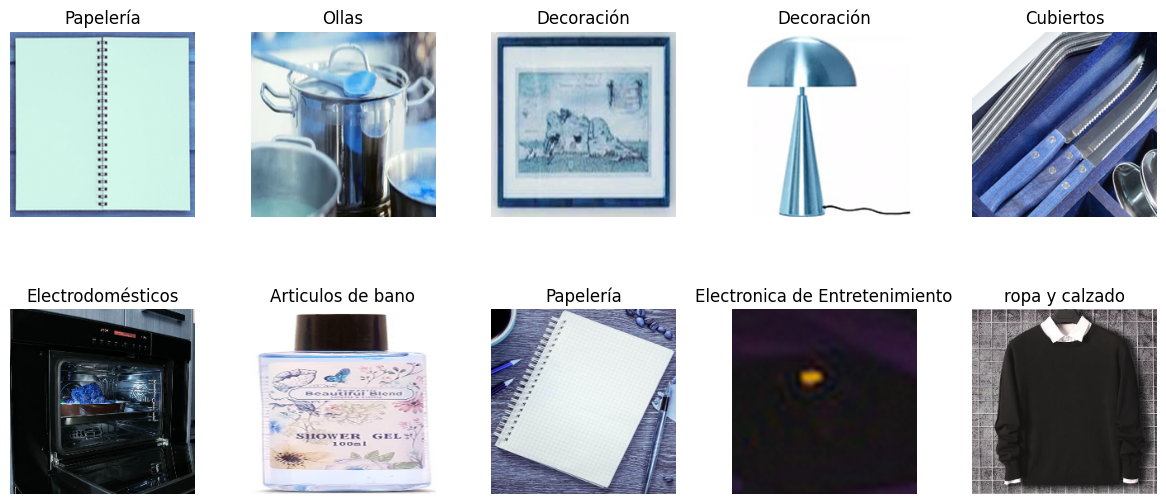

In [ ]:
import matplotlib.pyplot as plt
import random
# Asegúrate de que la longitud de etiquetas_imagenes coincida con la cantidad de imágenes que deseas mostrar
# En este caso, seleccionaremos 10 índices de manera aleatoria
indices_aleatorios = random.sample(range(len(fotos_recortadas)), 10)

# Obtén las imágenes y etiquetas correspondientes a los índices seleccionados
imagenes_a_mostrar = [fotos_recortadas[i] for i in indices_aleatorios]
etiquetas_a_mostrar = [etiquetas_recortadas[i] for i in indices_aleatorios]

# Configura la visualización de las imágenes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5)
for i, (imagen, etiqueta) in enumerate(zip(imagenes_a_mostrar, etiquetas_a_mostrar)):
    ax = axes[i // 5, i % 5]
    ax.imshow(imagen)
    ax.set_title(etiqueta)
    ax.axis('off')

plt.show()

In [ ]:
imagenes_a_mostrar = []
etiquetas_a_mostrar = []



#2. **Modelo CNN Personalizado:**
   - Diseña y construye un modelo de red neuronal convolucional personalizado. Puedes utilizar bibliotecas como TensorFlow y Keras para esto.
   - Divide tus datos en conjuntos de entrenamiento y prueba.
   - Entrena tu modelo en los datos de entrenamiento y evalúalo en los datos de prueba.
   - Aplica técnicas de optimización, como la búsqueda de hiperparámetros y la regularización, para mejorar el rendimiento del modelo.
   - Utiliza técnicas de aumento de datos para aumentar la cantidad de datos de entrenamiento y, por lo tanto, mejorar el rendimiento.

## Dividir el conjunto de datos en entrenamiento y prueba.
Utilizando las fotos y etiquetas de las fotos recortadas, generamos el conjunto de entrenamiento `X_train` y el conjunto de validación y testeo `X_test`

Uso de `stratify=etiquetas_recortadas` para balancear los datos de validación como de entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split

'''# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    balanced_images, balanced_labels, test_size=0.2, random_state=42
)
'''
X_train, X_test, y_train, y_test = train_test_split(
    fotos_recortadas, etiquetas_recortadas , test_size=0.3, random_state=42, stratify=etiquetas_recortadas
)


In [ ]:
counter = Counter( y_train)
counter

Counter({'juego de mesa': 46,
         'Toallas': 46,
         'Electrodomésticos': 48,
         'herramientas': 46,
         'Muebles': 47,
         'Articulos de Jardin': 45,
         'Lápices': 48,
         'ropa y calzado': 46,
         'Juguetes': 46,
         'Ollas': 46,
         'Papelería': 48,
         'Decoración': 46,
         'productos de limpieza': 46,
         'Electronica de Entretenimiento': 41,
         'Cubiertos': 46,
         'Articulos de bano': 43})

In [ ]:
counter = Counter( y_test)
counter

Counter({'Electrodomésticos': 20,
         'Lápices': 20,
         'juego de mesa': 20,
         'Juguetes': 19,
         'Decoración': 20,
         'herramientas': 20,
         'Ollas': 20,
         'Articulos de bano': 19,
         'productos de limpieza': 20,
         'Cubiertos': 20,
         'ropa y calzado': 20,
         'Articulos de Jardin': 20,
         'Electronica de Entretenimiento': 17,
         'Toallas': 20,
         'Papelería': 20,
         'Muebles': 20})

In [ ]:
# Obtenemos el tamaño del conjunto de entrenamiento
n_train = len(X_train)

# Obtenemos el tamaño del conjunto de prueba
n_test = len(X_test)

print("Tamaño del conjunto de entrenamiento:", n_train)
print("Tamaño del conjunto de prueba:", n_test)


Tamaño del conjunto de entrenamiento: 734
Tamaño del conjunto de prueba: 315


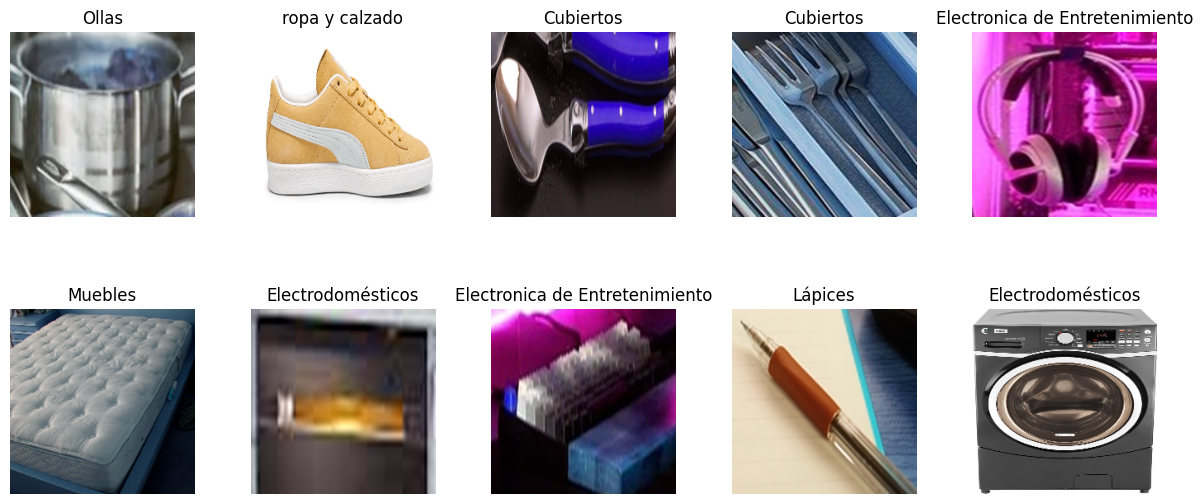

In [ ]:
import matplotlib.pyplot as plt
import random
# Asegúrate de que la longitud de etiquetas_imagenes coincida con la cantidad de imágenes que deseas mostrar
# En este caso, seleccionaremos 10 índices de manera aleatoria
indices_aleatorios = random.sample(range(len(X_train)), 10)

# Obtén las imágenes y etiquetas correspondientes a los índices seleccionados
imagenes_a_mostrar = [X_train[i] for i in indices_aleatorios]
etiquetas_a_mostrar = [y_train[i] for i in indices_aleatorios]

# Configura la visualización de las imágenes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5)
for i, (imagen, etiqueta) in enumerate(zip(imagenes_a_mostrar, etiquetas_a_mostrar)):
    ax = axes[i // 5, i % 5]
    ax.imshow(imagen)
    ax.set_title(etiqueta)
    ax.axis('off')

plt.show()

##Convertir Etiquetas Multiclase a Etiquetas Binarias con One-Hot Encoding
Se utilizo la clase `LabelBinarizer` de **scikit-learn** para convertir etiquetas multiclase en etiquetas binarias (one-hot encoding). Primero, se crea una instancia de `LabelBinarizer` y se ajusta a las etiquetas de entrenamiento. Luego, se transforman las etiquetas de entrenamiento y prueba en vectores one-hot. de tal forma que , `y_train_one_hot` y `y_test_one_hot` contendrán las etiquetas en formato one-hot.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Define una instancia de LabelBinarizer
label_binarizer = LabelBinarizer()

# Ajusta el LabelBinarizer a tus etiquetas
label_binarizer.fit(y_train)

# Transforma tus etiquetas en vectores one-hot
y_train_one_hot = label_binarizer.transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)
# En este punto, y_train_one_hot y y_test_one_hot contendrán las etiquetas en formato one-hot


In [ ]:
class_names = label_binarizer.classes_
print(class_names)
print(len(class_names))

['Articulos de Jardin' 'Articulos de bano' 'Cubiertos' 'Decoración'
 'Electrodomésticos' 'Electronica de Entretenimiento' 'Juguetes' 'Lápices'
 'Muebles' 'Ollas' 'Papelería' 'Toallas' 'herramientas' 'juego de mesa'
 'productos de limpieza' 'ropa y calzado']
16


In [ ]:
class_names_list = class_names.tolist()

In [ ]:
y_train[1]

'Toallas'

In [ ]:
y_train_one_hot[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y_train.clear()
y_test.clear()

##**Creación y Compilación de un Modelo de Red Neuronal Convolucional (CNN) con TensorFlow/Keras**

En este código, se creo un modelo de red neuronal convolucional (CNN) utilizando **TensorFlow/Keras**. El modelo consta de varias capas convolucionales, capas de agrupación (pooling), capas de dropout y capas densas. Las capas convolucionales extraen características de las imágenes, mientras que las capas densas clasifican las características extraídas. El optimizador utilizado es **Adam**, y la función de pérdida es **categorical_crossentropy**.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.optimizers import Adam, Adagrad

# Crear el modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(ancho, alto, 3)),
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.Dropout(0.5),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    #Cambiar segun la cantidad de clases
    layers.Dense(len(class_names), activation='softmax')
])


#optimizer = Adagrad(learning_rate=0.0015)
optimizer = Adam(learning_rate=0.0001)
# Compilar el modelo
model.compile(optimizer=optimizer,  # Utiliza el optimizador Adam
              loss='categorical_crossentropy',  # Ajusta esto según tu problema
              metrics=['accuracy'])

##Definición del "Early Stopping".
Aquí se definió el `EarlyStopping`, de tal forma que, detiene el entrenamiento de un modelo cuando la precisión en el conjunto de validación deja de mejorar.

La clase `EarlyStopping` recibe varios argumentos, como la métrica a monitorizar (`val_loss`), el modo de optimización (`min`), la paciencia (`3`), El entrenamiento se detendrá después de 3 épocas sin mejora en la métrica monitorizada .


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


Early_Stopping = EarlyStopping(
    monitor='val_loss',  # Monitoriza la métrica 'val_loss'.
    mode='min',              # El objetivo es minimizar la métrica monitorizada.
    patience=3,              # El entrenamiento se detendrá después de n épocas sin mejora.
    verbose=1                # Mostrar mensajes de registro para el progreso del entrenamiento.
)


## 1. Calcula los pesos de clase:

   Se calculan los pesos de clase inversamente proporcionales a la frecuencia de cada clase. Esto asegurará que las clases minoritarias tengan un peso mayor. Puedes usar la biblioteca Scikit-learn para calcular estos pesos. Asegúrate de que estás utilizando los datos balanceados para calcular los pesos de clase.


Al proporcionar los pesos de clase al ajustar el modelo, el modelo prestará más atención a las clases minoritarias durante el entrenamiento, lo que debería ayudar a mejorar el rendimiento en un conjunto de datos desbalanceado. Ajusta los hiperparámetros y experimenta con diferentes arquitecturas de modelo si es necesario para obtener mejores resultados.

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Convierte las etiquetas one-hot de nuevo a su formato original
y_train_labels = np.argmax(y_train_one_hot, axis=1)

# Calcula los pesos de las clases
pesos_clases = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_labels), y=y_train_labels)

# Convierte los pesos de las clases a un diccionario para usarlo en el entrenamiento
pesos_clases_dict = dict(enumerate(pesos_clases))

In [ ]:
y_train_labels

array([13, 11, 13,  4, 12,  8,  0,  4,  7, 15,  6, 15,  7,  9, 10,  6, 11,
        4,  9,  8, 11,  8,  3, 14,  5,  4, 10,  6, 13, 13,  0,  7,  3, 13,
        8,  5, 10,  0,  2,  4, 10,  8, 14, 15,  4, 13,  2,  7, 11,  3,  4,
       10,  4,  8, 10, 11, 10, 11, 12, 14, 10, 15,  2, 14, 15,  3, 11, 12,
       15,  3,  7, 12,  3, 10,  8, 11,  4, 13,  6,  1, 10,  5,  0, 13,  3,
       14, 10,  8, 15,  4,  4,  0,  3,  1,  6, 10, 11,  9, 14, 10,  1,  0,
        1,  1,  0,  8,  8, 12, 12, 13,  7,  7,  4,  8,  9,  5,  6,  7,  1,
        7, 15, 14,  7, 11, 10,  8, 12, 15,  5, 10, 13,  0,  1, 13,  9,  6,
        2,  5, 10,  4,  5,  1, 12,  5, 14,  2,  7, 10,  7,  0,  2, 11,  9,
       12,  1,  9,  9,  6,  7,  0,  6, 11, 11,  0,  1,  5,  5,  2, 13,  6,
        0,  6,  3,  4, 13,  9,  9,  9,  9, 10,  8,  6,  4,  1,  5,  2,  5,
        8,  9,  5,  1,  5,  7,  2,  7,  0,  3, 12, 14,  8,  6, 11,  3,  2,
        5, 15, 14,  2,  9,  7,  7, 14,  4, 15,  0, 10, 11,  3, 13, 11,  2,
        1,  2, 13, 15,  5

##**Entrenamiento de un Modelo de CNN con Early Stopping en TensorFlow/Keras**

aquí, se entrenó el modelo de red neuronal convolucional (CNN) con el método `fit` de **TensorFlow/Keras**.
El método `fit` recibe como argumentos los datos de entrenamiento (`X_train`, `y_train_one_hot`), el tamaño de lote (`batch_size=32`), el número máximo de épocas (`epochs=30`), el nivel de registro (`verbose=1`), los datos de validación (`X_test`, `y_test_one_hot`) y una lista de devoluciones de llamada (`callbacks=[Early_Stopping]`), de tal forma que el entrenamiento se detiene antes de las 30 épocas en caso de que este no aumente el acuraccy de validación.

Por tanto, se están utilizando técnicas de regularización como el early stopping y el dropout. La técnica de early stopping consiste en detener el entrenamiento cuando se detecta que el modelo no mejora su rendimiento en el conjunto de validación, evitando así el sobreajuste. La técnica de dropout consiste en desactivar aleatoriamente algunas unidades o neuronas de la red durante el entrenamiento, lo que reduce la dependencia entre ellas y aumenta la capacidad de generalización del modelo .

In [ ]:
# Usando len para obtener el tamaño de X_train y y_train_one_hot
size_X_train = len(X_train)
size_y_train = len(y_train_one_hot)

print(f"Tamaño de X_train: {size_X_train}")
print(f"Tamaño de y_train_one_hot: {size_y_train}")


Tamaño de X_train: 734
Tamaño de y_train_one_hot: 734


In [ ]:
history_model = model.fit(X_train, y_train_one_hot,
                              batch_size=16,
                              epochs=100,
                              verbose=1,
                              validation_data=(X_test, y_test_one_hot),
                              callbacks=[Early_Stopping],
                              class_weight= pesos_clases_dict
                              )


Epoch 1/100
46/46 [==============================] - 15s 67ms/step - loss: 2.7736 - accuracy: 0.0722 - val_loss: 2.7671 - val_accuracy: 0.0794
Epoch 2/100
46/46 [==============================] - 2s 37ms/step - loss: 2.7428 - accuracy: 0.0954 - val_loss: 2.6935 - val_accuracy: 0.1556
Epoch 3/100
46/46 [==============================] - 2s 37ms/step - loss: 2.5345 - accuracy: 0.1894 - val_loss: 2.5176 - val_accuracy: 0.1873
Epoch 4/100
46/46 [==============================] - 2s 37ms/step - loss: 2.2534 - accuracy: 0.3011 - val_loss: 2.3657 - val_accuracy: 0.2095
Epoch 5/100
46/46 [==============================] - 2s 37ms/step - loss: 1.9748 - accuracy: 0.3924 - val_loss: 2.1837 - val_accuracy: 0.3111
Epoch 6/100
46/46 [==============================] - 2s 37ms/step - loss: 1.7026 - accuracy: 0.4946 - val_loss: 2.1090 - val_accuracy: 0.3429
Epoch 7/100
46/46 [==============================] - 2s 36ms/step - loss: 1.4745 - accuracy: 0.5504 - val_loss: 2.1322 - val_accuracy: 0.3333
Epoch

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    # Extraer los valores del loss y el accuracy del diccionario history
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    # Crear una figura con dos subplots en una fila
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Subplot 1: Curva de pérdida (Loss)
    ax1.plot(range(1, len(loss) + 1), loss, 'b', label='Loss de entrenamiento')
    ax1.plot(range(1, len(val_loss) + 1), val_loss, 'bo', label='Loss de validación')
    ax1.set_xlabel('Épocas')
    ax1.set_ylabel('Loss')
    ax1.set_title('Curva de pérdida (Loss) durante el entrenamiento')
    ax1.legend()

    # Subplot 2: Curva de precisión (Accuracy)
    ax2.plot(range(1, len(accuracy) + 1), accuracy, 'r', label='Accuracy de entrenamiento')
    ax2.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'ro', label='Accuracy de validación')
    ax2.set_xlabel('Épocas')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Curva de precisión (Accuracy) durante el entrenamiento')
    ax2.legend()

    # Ajustar el espaciado entre los subplots
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

## Gráfico de métricas de entrenamiento (loss y accuracy)
* Si bien el entrenamiento se comporta de manera adecuada, la precisión y pérdida de los datos de validación presentan **sobreajuste**. Esto sugiere que el modelo podría estar memorizando los datos de entrenamiento en lugar de generalizar correctamente a nuevos datos.

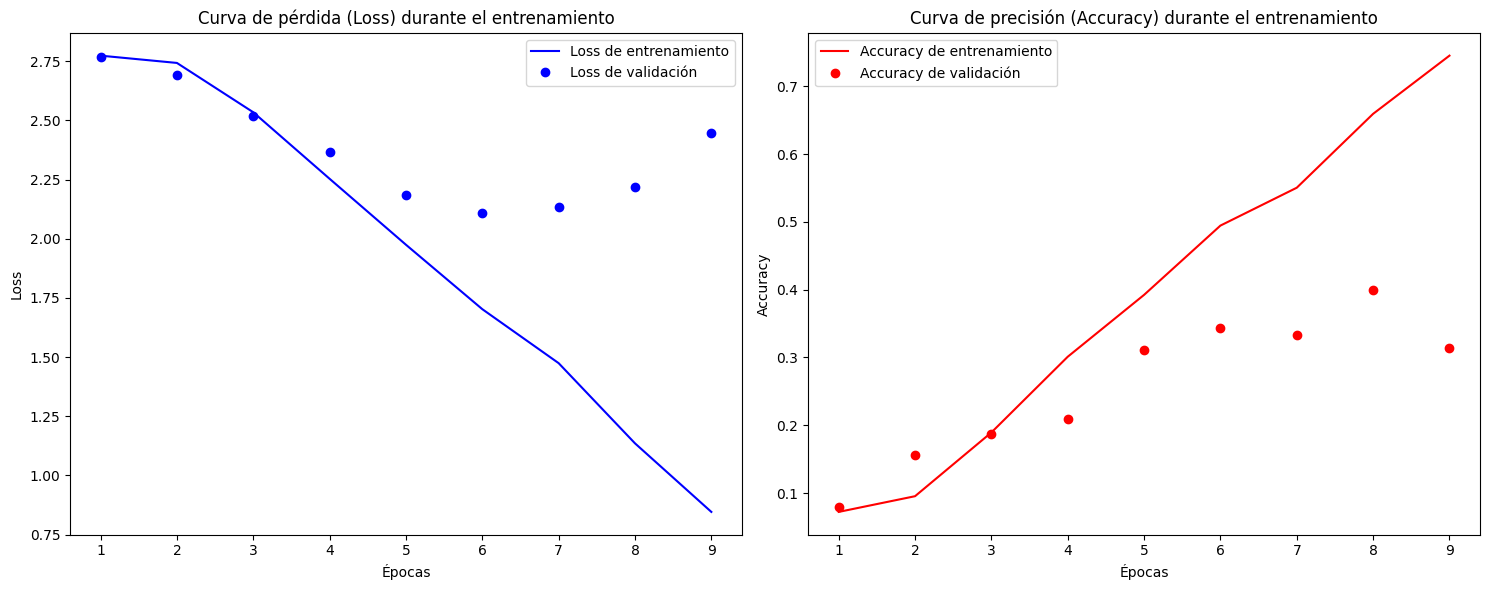

In [ ]:
# Uso de la función
plot_loss_accuracy(history_model)

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def plot_classification_metrics(model, x_test, y_test, class_names):
    # Obtener las predicciones del modelo
    y_pred = model.predict(x_test)

    # Convertir las probabilidades en etiquetas de clase
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calcular las métricas de clasificación
    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

    # Crear listas de precisión, recall y F1-score para cada clase
    precision = [report[class_name]['precision'] for class_name in class_names]
    recall = [report[class_name]['recall'] for class_name in class_names]
    f1_score = [report[class_name]['f1-score'] for class_name in class_names]

    # Encontrar la clase con la mayor precisión y resaltarla
    max_precision_idx = precision.index(max(precision))
    colors = ['lightblue' if i != max_precision_idx else 'blue' for i in range(len(class_names))]

    # Crear un gráfico de barras horizontales para la precisión
    plt.figure(figsize=(6, 4))
    bars = plt.barh(class_names, precision, color=colors, alpha=0.7)
    plt.title('Precisión por Clase')
    plt.xlabel('Precisión')
    plt.xlim(0, 1)

    # Agregar valores en cada barra
    for bar, val in zip(bars, precision):
        plt.text(val, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center')

    plt.show()

    # Encontrar la clase con el mayor recall y resaltarla
    max_recall_idx = recall.index(max(recall))
    colors = ['lightgreen' if i != max_recall_idx else 'green' for i in range(len(class_names))]

    # Crear un gráfico de barras horizontales para el recall
    plt.figure(figsize=(6, 4))
    bars = plt.barh(class_names, recall, color=colors, alpha=0.7)
    plt.title('Recall por Clase')
    plt.xlabel('Recall')
    plt.xlim(0, 1)

    # Agregar valores en cada barra
    for bar, val in zip(bars, recall):
        plt.text(val, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center')

    plt.show()

    # Encontrar la clase con el mayor F1-score y resaltarla
    max_f1_score_idx = f1_score.index(max(f1_score))
    colors = ['lightcoral' if i != max_f1_score_idx else '#8B0000' for i in range(len(class_names))]

    # Crear un gráfico de barras horizontales para el F1-score
    plt.figure(figsize=(6, 4))
    bars = plt.barh(class_names, f1_score, color=colors, alpha=0.7)
    plt.title('F1-score por Clase')
    plt.xlabel('F1-score')
    plt.xlim(0, 1)

    # Agregar valores en cada barra
    for bar, val in zip(bars, f1_score):
        plt.text(val, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center')

    plt.show()



## Grafico de barras de Precision, Recall y F1-score
Como se esperaba de los resultados del entrenamiento, el modelo no logra generalizar bien a la hora de hacer predicciones, por lo que su precision, recall y, por consiguiente, su F1-Score son relativamente bajos para considerarlos buenos. **La clase de productos de limpieza** muestra la mayor **predictibilidad**, mientras que la de **lápices** es la peor en términos de rendimiento.

###Notas sobre recall, precision y F1-score:
- **Precision**: Mide la proporción de verdaderos positivos (instancias correctamente clasificadas) respecto a todas las instancias clasificadas como positivas. Se calcula como:

$$\text{Precision} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}}$$

- **Recall (Sensibilidad)**: Representa la proporción de verdaderos positivos respecto a todas las instancias que realmente son positivas. Se calcula como:

$$\text{Recall} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}$$

- **F1-score**: Es una métrica que combina precision y recall en un solo valor. Es útil cuando queremos encontrar un equilibrio entre ambas métricas. Se calcula como:

$$\text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$


10/10 [==============================] - 1s 50ms/step


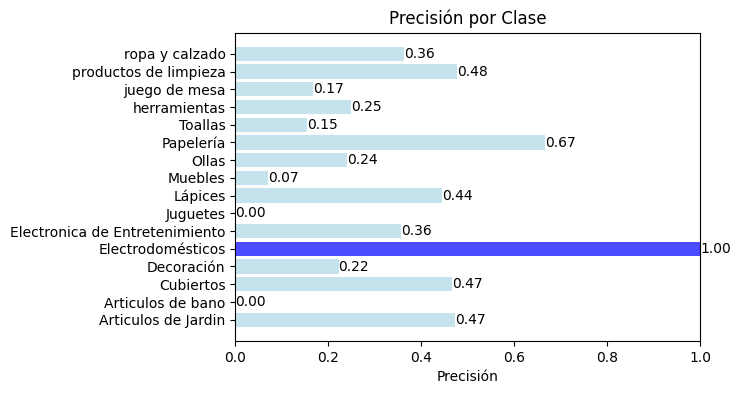

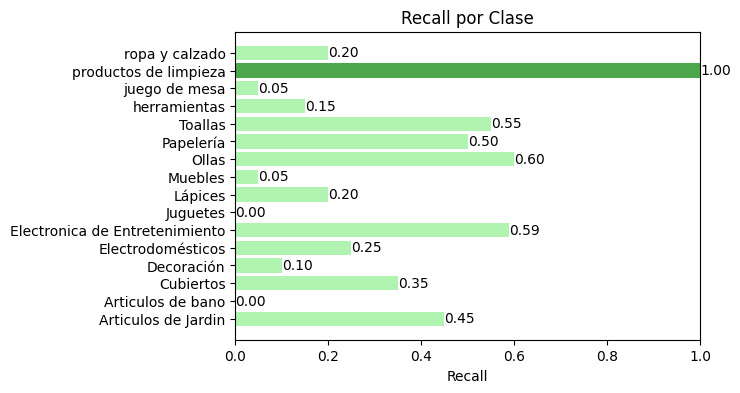

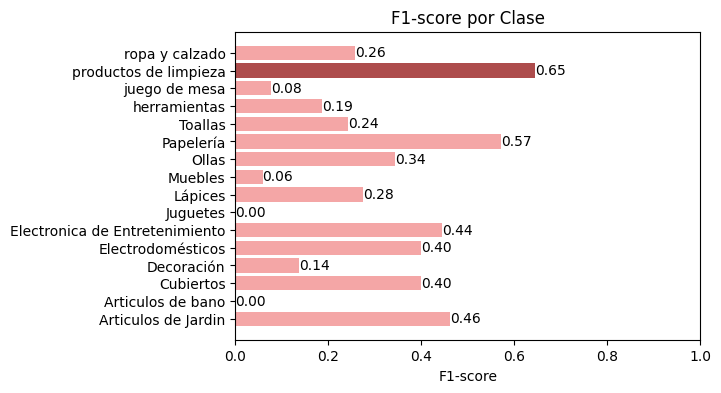

In [ ]:
# Llama a esta función después de entrenar tu modelo y antes de mostrar la matriz de confusión
plot_classification_metrics(model, X_test, y_test_one_hot, class_names_list)

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, x_test, y_test, class_names):
    # Usar el método predict del modelo para obtener las probabilidades de cada clase para cada imagen del conjunto de prueba
    predicted_classes = model.predict(x_test)

    # Convertir las probabilidades en etiquetas de clase numéricas
    predicted_classes = np.argmax(predicted_classes, axis=1)
    y_test_class = np.argmax(y_test, axis=1)

    # Crear la matriz de confusión
    matriz = metrics.confusion_matrix(y_test_class, predicted_classes)

    # Crear una figura con matplotlib
    plt.figure(figsize=(10, 10))

    # Graficar la matriz de confusión con seaborn
    sns.heatmap(matriz, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_names, yticklabels=class_names)

    # Añadir título y etiquetas
    plt.title('Matriz de confusión', y=1.005, size=15)
    plt.xlabel('Clase predicha')
    plt.ylabel('Clase real')

    # Mostrar la figura
    plt.show()

## Matriz de confusión del primer entrenamiento
Con la matriz de confusión, **podemos contrastar los resultados de precisión, recall y F1-score**. A simple vista, es evidente que las clases con mayor predictividad son apreciables. Sin embargo, también se nota que el modelo está un poco desequilibrado en términos de la cantidad de datos de prueba.

Nota:
**La clase de productos de limpieza** muestra la mayor **predictibilidad**, mientras que la de **lápices** es la peor en términos de rendimiento para el primer entrenamiento.


10/10 [==============================] - 0s 13ms/step


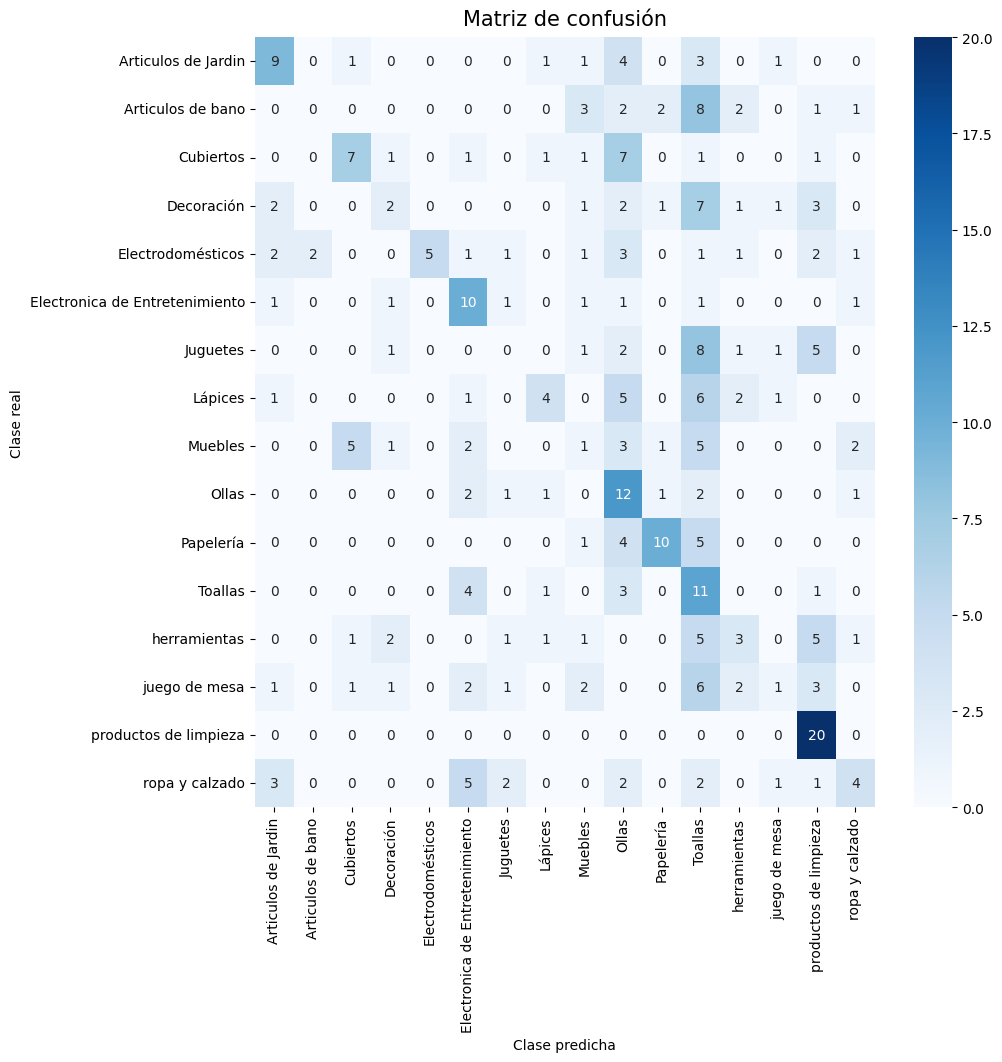

In [ ]:
# Uso de la función
plot_confusion_matrix(model, X_test, y_test_one_hot, class_names_list)

# Data augmentation

Usando las tecnicas del Hw 3, aplicamos data augmentation utilizando herramientas de tensorflow, utilizando un pipeline y cache para aumetar la Eficiencia del entrenameinto https://www.tensorflow.org/guide/data_performance?hl=es-419

## Configuración del flujo de datos
1. **`batch_size = 32`**: Este parámetro determina la cantidad de imágenes que se procesarán juntas en cada iteración durante el entrenamiento del modelo. Un valor de 32 significa que se tomarán 32 imágenes a la vez y se calcularán las actualizaciones de los pesos del modelo en función de ese lote. El tamaño del lote afecta la velocidad de entrenamiento y la memoria requerida. Un valor más grande puede acelerar el entrenamiento, pero también puede requerir más memoria.

2. **`AUTOTUNE`**: Es una constante especial proporcionada por TensorFlow. Cuando se aplica a un conjunto de datos, TensorFlow ajusta automáticamente el rendimiento en función del hardware y la carga de trabajo específicos. En este caso, se utiliza para optimizar la eficiencia al cargar y procesar datos.

3. **`IMG_SIZE = 224`**: Este valor representa el tamaño al que se redimensionarán todas las imágenes antes de ingresar al modelo. Las imágenes generalmente se escalan a un tamaño uniforme para que el modelo pueda procesarlas de manera consistente. En este caso, las imágenes se redimensionan a una resolución de 224x224 píxeles.


In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE
IMG_SIZE = 224

## Función para el data Augmentation

1. **Redimensionar y recortar**: La función comienza redimensionando la imagen al tamaño `IMG_SIZE + 6` (agregando 6 píxeles a cada dimensión) utilizando `tf.image.resize_with_crop_or_pad`. Esto asegura que haya suficiente espacio para aplicar transformaciones sin recortar partes importantes de la imagen.

2. **Recorte aleatorio**: Luego, se aplica un recorte aleatorio a la imagen para volver al tamaño original (`IMG_SIZE x IMG_SIZE x 3`) utilizando `tf.image.stateless_random_crop`. Esto simula la variabilidad en la posición de los objetos en la imagen.

3. **Brillo aleatorio**: Se ajusta el brillo de la imagen de manera aleatoria utilizando `tf.image.stateless_random_brightness`. El valor máximo de cambio de brillo es 0.5. Luego, se asegura de que los valores de píxeles estén dentro del rango [0, 1] con `tf.clip_by_value`.

In [ ]:
def augment(image_label, seed):
  image, label = image_label
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)

  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]

  # Random crop back to the original size.
  image = tf.image.stateless_random_crop(
      image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)

  # Random brightness.
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label



1. **`tf.random.Generator.from_seed(123, alg='philox')`**: Esta línea crea un objeto generador de números aleatorios utilizando una semilla (seed) específica. El valor `123` se utiliza como la semilla inicial. Además, se especifica el algoritmo de generación de números aleatorios como `'philox'`.

In [ ]:
# Create a generator.
rng = tf.random.Generator.from_seed(123, alg='philox')

## **def f(x, y):**

2. **`seed = rng.make_seeds(2)[0]`**: Esta línea genera una nueva semilla aleatoria utilizando el objeto generador `rng` que se creó anteriormente. La función `make_seeds` toma un argumento que indica el número de semillas que se quieren generar. En este caso, se genera una sola semilla y se almacena en la variable `seed`.

3. **`image, label = augment((x, y), seed)`**: Esta línea llama a la función `augment` que se definió previamente para aplicar transformaciones aleatorias a la imagen y la etiqueta. La función `augment` toma dos argumentos: una tupla que contiene la imagen y la etiqueta (`(x, y)`) y la semilla aleatoria (`seed`). La función devuelve una nueva imagen y etiqueta transformadas, que se asignan a las variables `image` y `label`.

4. **`return image, label`**: Esta línea devuelve la imagen y la etiqueta transformadas como el resultado de la función `f`.

In [ ]:
# Create a wrapper function for updating seeds.
def f(x, y):
  seed = rng.make_seeds(2)[0]
  image, label = augment((x, y), seed)
  return image, label

## Crear conjuntos de datos TensorFlow a partir de los datos divididos

1. **`tf.data.Dataset.from_tensor_slices((X_train, y_train_one_hot))`**: Esta línea crea un conjunto de datos llamado `train_ds` a partir de los datos de entrenamiento (`X_train` y `y_train_one_hot`). La función `from_tensor_slices` toma dos tensores como argumentos y crea un conjunto de datos que itera a lo largo de las dimensiones del primer tensor (`X_train`) y empareja cada elemento con el correspondiente del segundo tensor (`y_train_one_hot`).

2. **`tf.data.Dataset.from_tensor_slices((X_test, y_test_one_hot))`**: Similarmente, esta línea crea un conjunto de datos llamado `test_ds` a partir de los datos de prueba (`X_test` y `y_test_one_hot`).


In [ ]:
# Crear conjuntos de datos TensorFlow a partir de los datos divididos
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_one_hot))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_one_hot))

##Definición del conjunto de entrenamiento aumentado y mejorar la eficiencia del modelo.

Aquí,se aplicaron dos técnicas importantes para mejorar la eficiencia y el rendimiento de los conjuntos de datos durante el entrenamiento
1. **`train_ds`**:
    - **`shuffle(1000)`**: Se mezclan aleatoriamente los elementos del conjunto de datos para evitar que el modelo memorice patrones específicos del orden de los datos.
    - **`map(f, num_parallel_calls=AUTOTUNE)`**: Se aplica la función `f` (definida previamente) a cada elemento del conjunto de datos. `num_parallel_calls=AUTOTUNE` permite que TensorFlow utilice automáticamente múltiples núcleos de CPU para acelerar el procesamiento.
    - **`batch(batch_size)`**: Agrupa los elementos en lotes del tamaño especificado (`batch_size`). Esto es útil para procesar varios ejemplos a la vez durante el entrenamiento.
    - **`prefetch(AUTOTUNE)`**: Carga los datos en segundo plano mientras se realiza el entrenamiento, mejorando así la eficiencia.

2. **`test_ds`**:
    - **`batch(batch_size)`**: Similarmente, se agrupan los elementos del conjunto de datos de prueba en lotes.
    - **`prefetch(AUTOTUNE)`**: También se aplica la técnica de precarga para acelerar la evaluación del modelo.


In [ ]:
# Aplicar cache y prefetch a los conjuntos de datos
train_ds = (
    train_ds
    .shuffle(1000)
    .map(f, num_parallel_calls=AUTOTUNE) # Funcion f
    .batch(batch_size)
    .cache()
    .prefetch(AUTOTUNE)
)

test_ds = (
    test_ds
    .batch(batch_size)
    .cache()
    .prefetch(AUTOTUNE)
)

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 16), dtype=tf.int64, name=None))>

In [ ]:
# Obtener el número de fotos en cada conjunto
num_fotos_train = train_ds.cardinality()
num_fotos_test = test_ds.cardinality()

# Imprimir el resultado
print(f"El conjunto de entrenamiento tiene {num_fotos_train} fotos.")
print(f"El conjunto de prueba tiene {num_fotos_test} fotos.")

El conjunto de entrenamiento tiene 23 fotos.
El conjunto de prueba tiene 10 fotos.


## Entrenamiento con data augmentation.
Se utiliza la misma configuración del modelo con la diferencia del uso del nuevo set de datos.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.optimizers import Adam, Adagrad

# Crear el modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(ancho, alto, 3)),
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.35),
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.Dropout(0.5),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    #Cambiar segun la cantidad de clases
    layers.Dense(len(class_names), activation='softmax')
])


#optimizer = Adagrad(learning_rate=0.0015)
optimizer = Adam(learning_rate=0.0001)
# Compilar el modelo
model.compile(optimizer=optimizer,  # Utiliza el optimizador Adam
              loss='categorical_crossentropy',  # Ajusta esto según tu problema
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


Early_Stopping = EarlyStopping(
    monitor='val_loss',  # Monitoriza la métrica 'val_loss'.
    mode='min',              # El objetivo es minimizar la métrica monitorizada.
    patience=3,              # El entrenamiento se detendrá después de n épocas sin mejora.
    verbose=1                # Mostrar mensajes de registro para el progreso del entrenamiento.
)


In [ ]:
history_model = model.fit(train_ds,
                              epochs=30,
                              verbose=1,
                              validation_data= test_ds,
                              callbacks=[Early_Stopping],
                              class_weight= pesos_clases_dict
                              )


Epoch 1/30
23/23 [==============================] - 6s 119ms/step - loss: 2.8041 - accuracy: 0.0518 - val_loss: 2.7700 - val_accuracy: 0.0825
Epoch 2/30
23/23 [==============================] - 1s 64ms/step - loss: 2.7658 - accuracy: 0.0777 - val_loss: 2.7679 - val_accuracy: 0.1175
Epoch 3/30
23/23 [==============================] - 1s 63ms/step - loss: 2.7586 - accuracy: 0.0845 - val_loss: 2.7541 - val_accuracy: 0.1397
Epoch 4/30
23/23 [==============================] - 1s 64ms/step - loss: 2.7217 - accuracy: 0.1485 - val_loss: 2.6899 - val_accuracy: 0.2063
Epoch 5/30
23/23 [==============================] - 1s 64ms/step - loss: 2.6197 - accuracy: 0.1608 - val_loss: 2.5719 - val_accuracy: 0.2540
Epoch 6/30
23/23 [==============================] - 1s 64ms/step - loss: 2.4685 - accuracy: 0.2044 - val_loss: 2.4075 - val_accuracy: 0.2635
Epoch 7/30
23/23 [==============================] - 1s 64ms/step - loss: 2.2921 - accuracy: 0.2738 - val_loss: 2.3354 - val_accuracy: 0.2825
Epoch 8/30
2

## Grafico de entrenamiento con data augmentation
Se presenta al igual que el caso anterior un entrenamiento con resultados adecuados, pero con sobreajuste en los datos de validación.

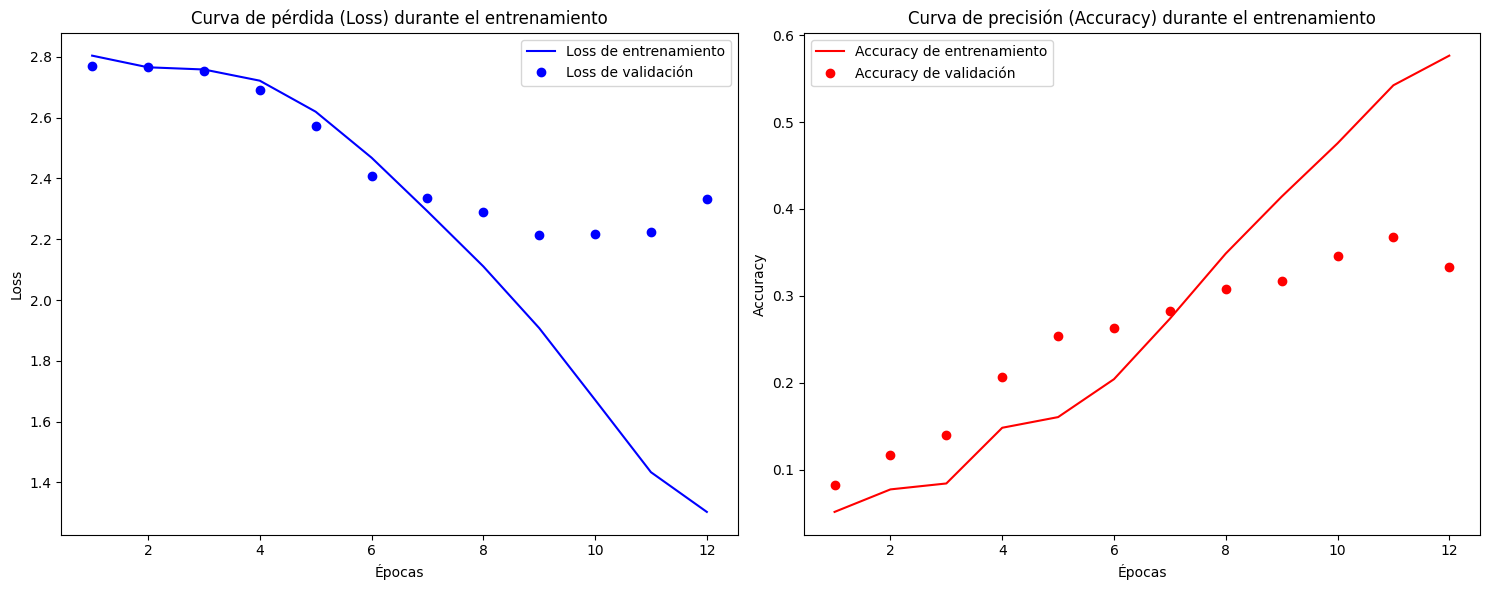

In [ ]:
# Uso de la función
plot_loss_accuracy(history_model)

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def plot_classification_metrics(model, x_test, y_test, class_names):
    # Obtener las predicciones del modelo
    y_pred = model.predict(x_test)

    # Convertir las probabilidades en etiquetas de clase
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calcular las métricas de clasificación
    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

    # Crear listas de precisión, recall y F1-score para cada clase
    precision = [report[class_name]['precision'] for class_name in class_names]
    recall = [report[class_name]['recall'] for class_name in class_names]
    f1_score = [report[class_name]['f1-score'] for class_name in class_names]

    # Encontrar la clase con la mayor precisión y resaltarla
    max_precision_idx = precision.index(max(precision))
    colors = ['lightblue' if i != max_precision_idx else 'blue' for i in range(len(class_names))]

    # Crear un gráfico de barras horizontales para la precisión
    plt.figure(figsize=(6, 4))
    bars = plt.barh(class_names, precision, color=colors, alpha=0.7)
    plt.title('Precisión por Clase')
    plt.xlabel('Precisión')
    plt.xlim(0, 1)

    # Agregar valores en cada barra
    for bar, val in zip(bars, precision):
        plt.text(val, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center')

    plt.show()

    # Encontrar la clase con el mayor recall y resaltarla
    max_recall_idx = recall.index(max(recall))
    colors = ['lightgreen' if i != max_recall_idx else 'green' for i in range(len(class_names))]

    # Crear un gráfico de barras horizontales para el recall
    plt.figure(figsize=(6, 4))
    bars = plt.barh(class_names, recall, color=colors, alpha=0.7)
    plt.title('Recall por Clase')
    plt.xlabel('Recall')
    plt.xlim(0, 1)

    # Agregar valores en cada barra
    for bar, val in zip(bars, recall):
        plt.text(val, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center')

    plt.show()

    # Encontrar la clase con el mayor F1-score y resaltarla
    max_f1_score_idx = f1_score.index(max(f1_score))
    colors = ['lightcoral' if i != max_f1_score_idx else '#8B0000' for i in range(len(class_names))]

    # Crear un gráfico de barras horizontales para el F1-score
    plt.figure(figsize=(6, 4))
    bars = plt.barh(class_names, f1_score, color=colors, alpha=0.7)
    plt.title('F1-score por Clase')
    plt.xlabel('F1-score')
    plt.xlim(0, 1)

    # Agregar valores en cada barra
    for bar, val in zip(bars, f1_score):
        plt.text(val, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center')

    plt.show()



## Grafico de barras de Precision, Recall y F1-score para entrenamiento con data augmantation
Al igual que el resultado anterior, el modelo no logra generalizar bien a la hora de hacer predicciones, por lo que su precision, recall y, por consiguiente, su F1-Score son relativamente bajos para considerarlos buenos. **La clase de productos de limpieza** sigue mostrando la  mayor **predictibilidad**, mientras que la de **Herramientas** es la peor en términos de rendimiento.

10/10 [==============================] - 0s 13ms/step


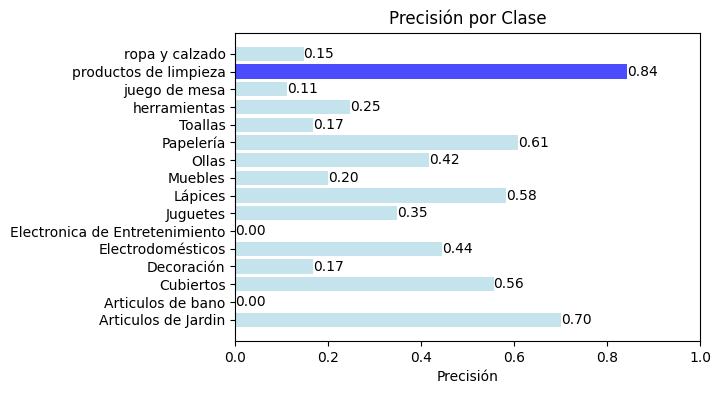

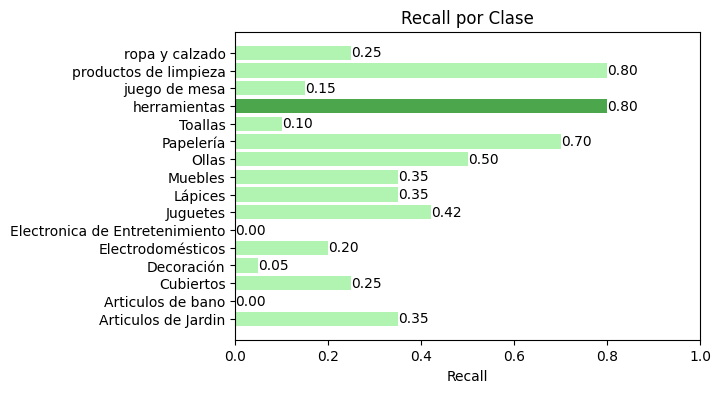

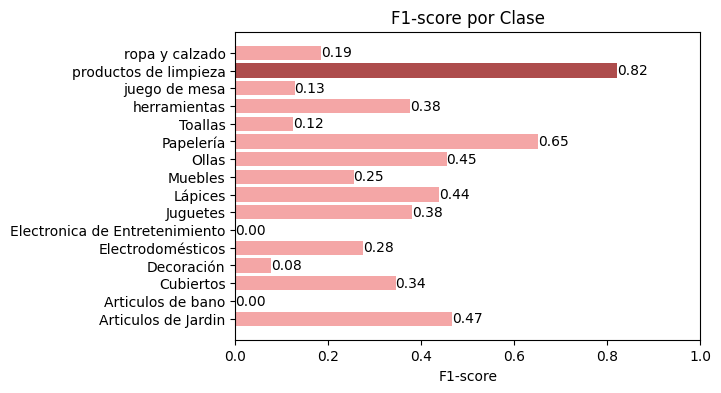

In [ ]:
# Llama a esta función después de entrenar tu modelo y antes de mostrar la matriz de confusión
plot_classification_metrics(model, X_test, y_test_one_hot, class_names_list)

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, x_test, y_test, class_names):
    # Usar el método predict del modelo para obtener las probabilidades de cada clase para cada imagen del conjunto de prueba
    predicted_classes = model.predict(x_test)

    # Convertir las probabilidades en etiquetas de clase numéricas
    predicted_classes = np.argmax(predicted_classes, axis=1)
    y_test_class = np.argmax(y_test, axis=1)

    # Crear la matriz de confusión
    matriz = metrics.confusion_matrix(y_test_class, predicted_classes)

    # Crear una figura con matplotlib
    plt.figure(figsize=(10, 10))

    # Graficar la matriz de confusión con seaborn
    sns.heatmap(matriz, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_names, yticklabels=class_names)

    # Añadir título y etiquetas
    plt.title('Matriz de confusión', y=1.005, size=15)
    plt.xlabel('Clase predicha')
    plt.ylabel('Clase real')

    # Mostrar la figura
    plt.show()

## Matriz de confusión del entrenamiento con DA
Con la matriz de confusión, **podemos contrastar los resultados de precisión, recall y F1-score**. Al igual que el caso anterior, la predictibilidad del modelo se ve reflejado en el f1 score, y la matriz e confusión.

**La clase de productos de limpieza** sigue mostrando la  mayor **predictibilidad**, mientras que la de **Herramientas** es la peor en términos de rendimiento.


10/10 [==============================] - 0s 13ms/step


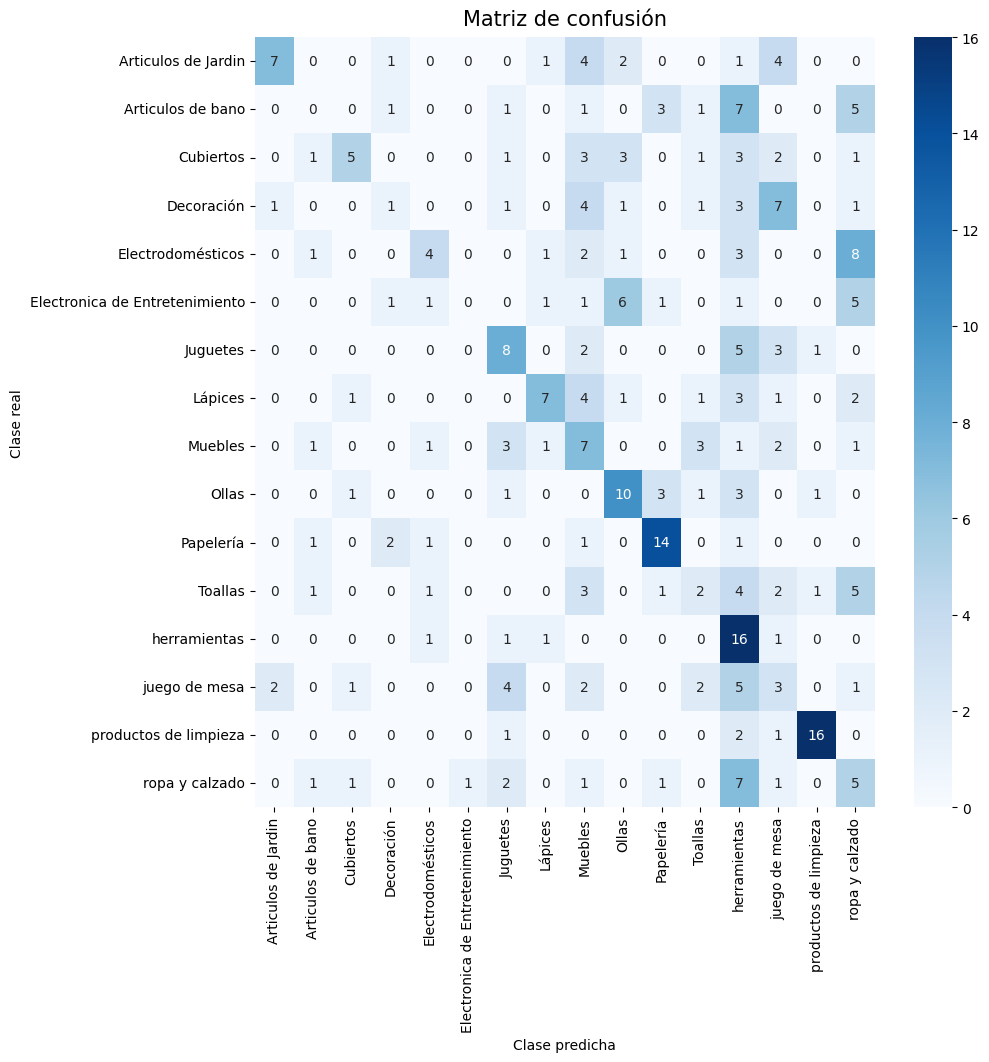

In [ ]:
# Uso de la función
plot_confusion_matrix(model, X_test, y_test_one_hot, class_names_list)

3. **Análisis de Resultados y Mejoras:**
   - Evalúa el rendimiento de tu modelo en términos de métricas como precisión, recall, F1-score, etc.
   - Identifica posibles áreas de mejora, como problemas de sobreajuste o subajuste.
   - Formule e implemente mejoras al modelo, como ajustes en la arquitectura de la red o el proceso de entrenamiento.

   ## Conclusión del caso con DA y sin DA para CNN
   
   Para los 2 casos si bien el entrenamiento se comporto de manera adecuada, los datos de validación pese a las técnicas de normalización, siguen teniendo sobreajuste.

# PARTE B:

4. **Modelos Preentrenados:**
   - Utiliza modelos preentrenados, como AlexNet, GoogleNet, MobilenetV2, Densenet169, VGG19, InceptionV3, Resnet18, Resnet50, Faster RCNN, SSD, RetinaNet, Inception-Resnet-V2, que están disponibles en bibliotecas como TensorFlow y PyTorch.
   - Ajusta los modelos preentrenados a tus datos específicos. Esto puede requerir cambios en la capa de salida y la reentrenamiento de algunas capas.

# Entrenamiento de modelos Preentrenados.
**Para todos los modelos preentrenados se considera que ya se esta trabajando con un *set de datos aumentados* en formato `tf.data.Dataset` , así como configuraciones de pipelines y almacenamiento en caché para hacer estos entrenamientos de la forma eficiente.**

### Fuentes de datos (MNIST,CIFAR100,ImageNeT,MS Coco,Pascal VOC (2012),Fashion MNIST)

Se eligió `ImageNet` en lugar de otros conjuntos de datos, como CIFAR-100, MNIST, o Fashion MNIST, debido a la naturaleza específica y diversa de las clases que deseas reconocer en tus imágenes. ImageNet es conocido por ser un conjunto de datos de gran escala con una amplia variedad de categorías, que abarcan desde objetos comunes hasta animales, vehículos y escenas.

Dado que estás interesado en reconocer objetos y categorías que incluyen "Cubiertos", "Toallas", "Decoración", "Electrodomésticos" y "juego de mesa", ImageNet tiene una mayor probabilidad de contener representaciones previas de objetos similares o relacionados en su conjunto de clases.

## 1. AlexNet (ImageNet), [NO UTILIZADO PYTORCH]

## 2. MobileNetV2 (ImageNet)

Al utilizar MobileNetV2 con `weights='imagenet'`, estás cargando una versión de MobileNetV2 que se ha entrenado en el conjunto de datos de ImageNet, que es un conjunto de datos grande y diverso que consta de millones de imágenes etiquetadas en miles de categorías diferentes. Con el argumento `include_top=False` no se estás incluyendo la capa de salida original de MobileNetV2, sino que se van agregando capas de salida personalizadas para adaptarse a este problema.(La capa de salida original de MobileNetV2 es una capa densa que clasifica las imágenes en 1000 clases)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Cargar el modelo preentrenado (Carga la red)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modificar la capa de salida para tres clases
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(0.5)(x)  # Agregar capa de Dropout
x = layers.Dense(512, activation='relu')(x)  # Agregar capa densa
x = layers.Dense(1024, activation='relu')(x)  # Agregar capa densa
x = layers.Dropout(0.5)(x)  # Agregar otra capa de Dropout
x = layers.Dense(len(class_names), activation='softmax')(x)

model_MobileNetV2 = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo

optimizer = Adam(learning_rate=0.0001)
#optimizer = Adam()
model_MobileNetV2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en tus datos
history_MobileNetV2 = model_MobileNetV2.fit(train_ds, epochs=30, verbose=1, validation_data=test_ds, callbacks=[Early_Stopping], class_weight=pesos_clases_dict)




9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/30
23/23 [==============================] - 24s 133ms/step - loss: 2.8968 - accuracy: 0.0913 - val_loss: 2.5127 - val_accuracy: 0.2857
Epoch 2/30
23/23 [==============================] - 1s 60ms/step - loss: 2.3634 - accuracy: 0.2480 - val_loss: 2.1943 - val_accuracy: 0.4825
Epoch 3/30
23/23 [==============================] - 1s 61ms/step - loss: 1.8900 - accuracy: 0.4755 - val_loss: 1.8587 - val_accuracy: 0.5492
Epoch 4/30
23/23 [==============================] - 1s 61ms/step - loss: 1.4692 - accuracy: 0.6104 - val_loss: 1.5260 - val_accuracy: 0.6095
Epoch 5/30
23/23 [==============================] - 1s 62ms/step - loss: 1.0029 - accuracy: 0.7616 - val_loss: 1.2534 - val_accuracy: 0.6603
Epoch 6/30
23/23 [==============================] - 1s 61ms/step - loss: 0.6964 - accuracy: 0.8365 - val_loss: 1.0808 - val_accuracy: 0.7048
Epoch 7/30
23/23 [==============================] - 1s 60ms/step - loss: 0.4340 - accurac

In [ ]:
# Evaluar el rendimiento del modelo
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f'Accuracy: {test_acc}')

10/10 - 0s - loss: 2.3321 - accuracy: 0.3333 - 197ms/epoch - 20ms/step
Accuracy: 0.3333333432674408


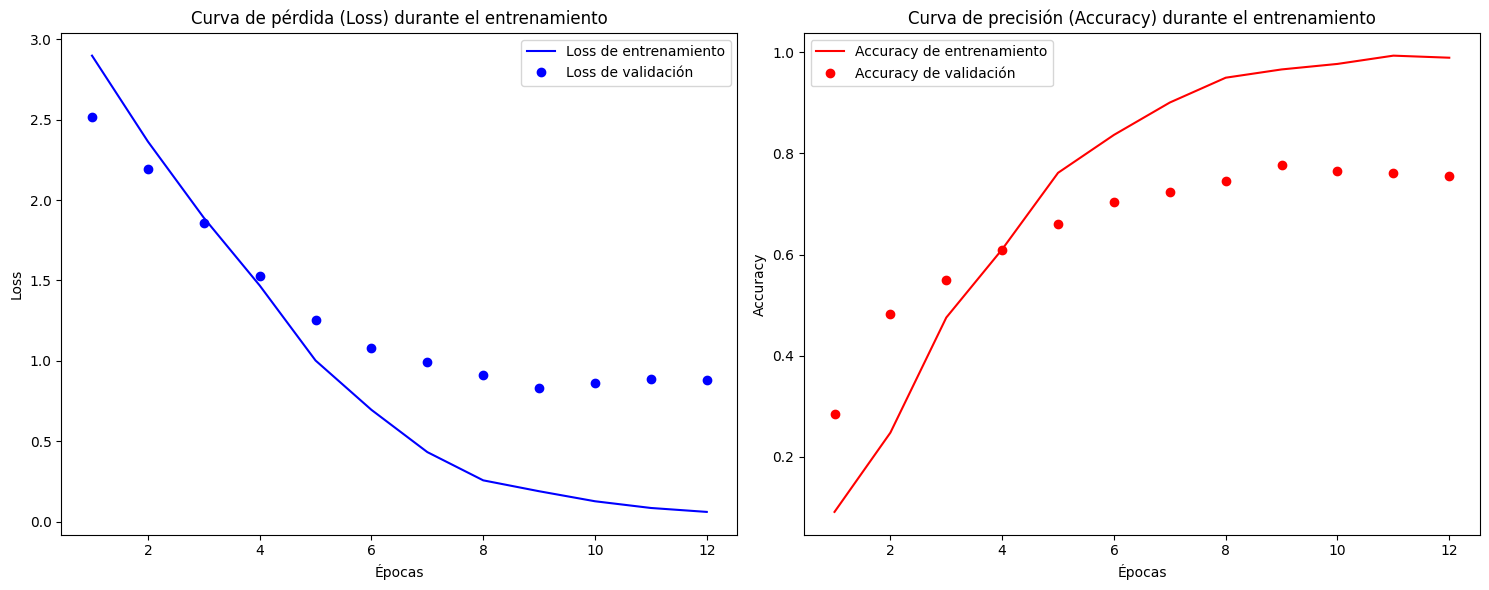

10/10 [==============================] - 1s 19ms/step


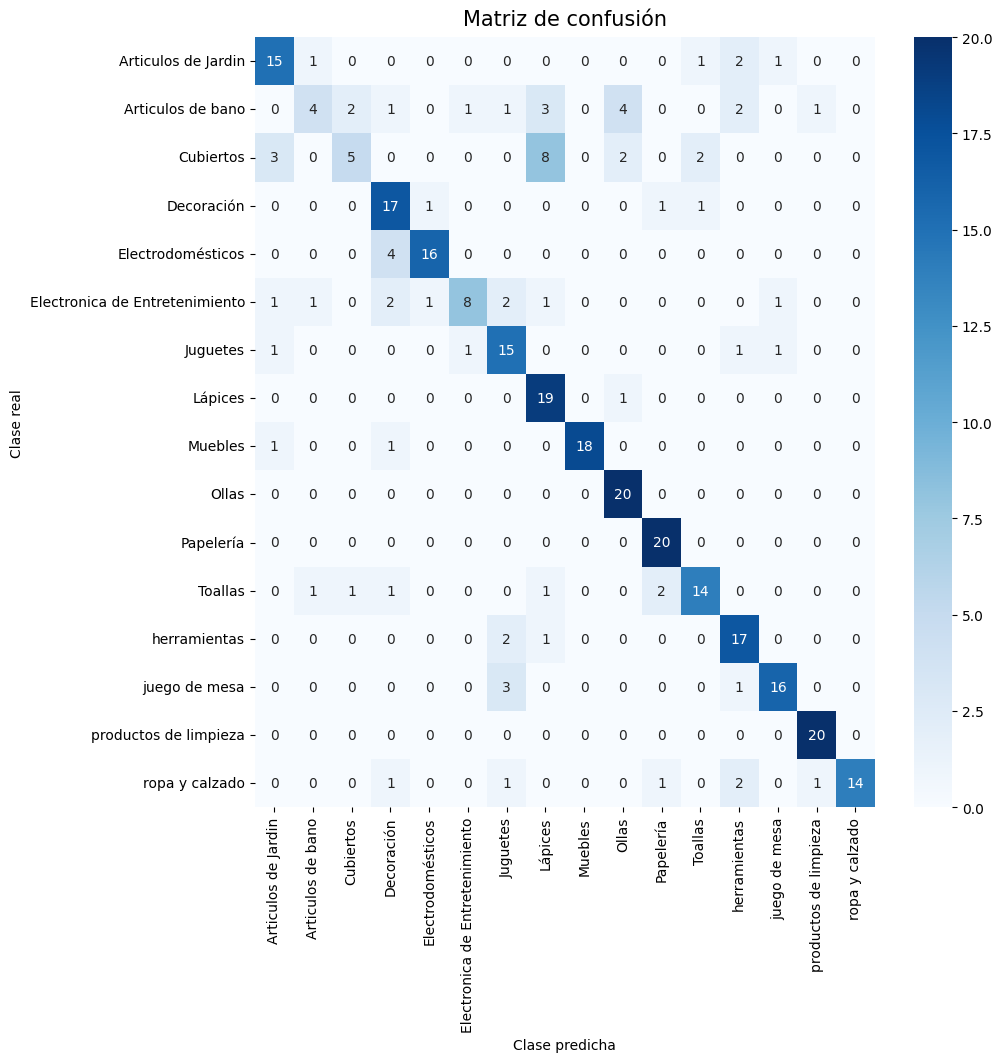

10/10 [==============================] - 0s 18ms/step


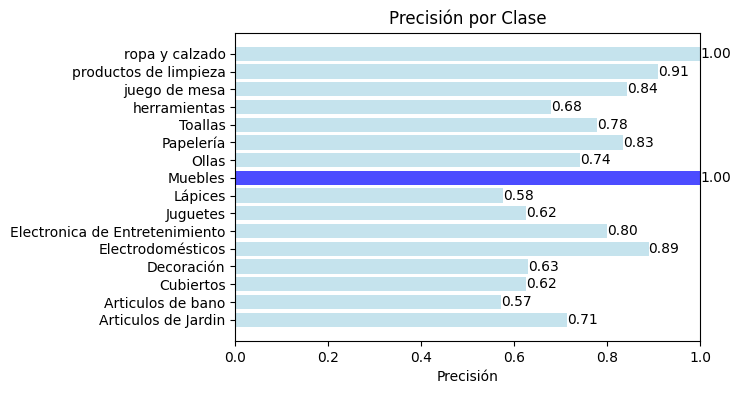

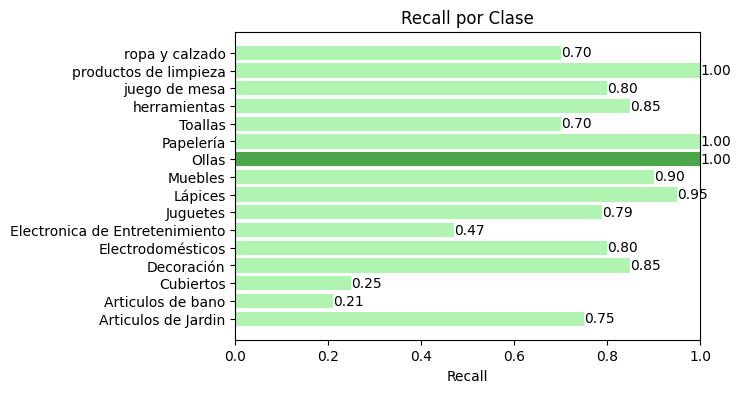

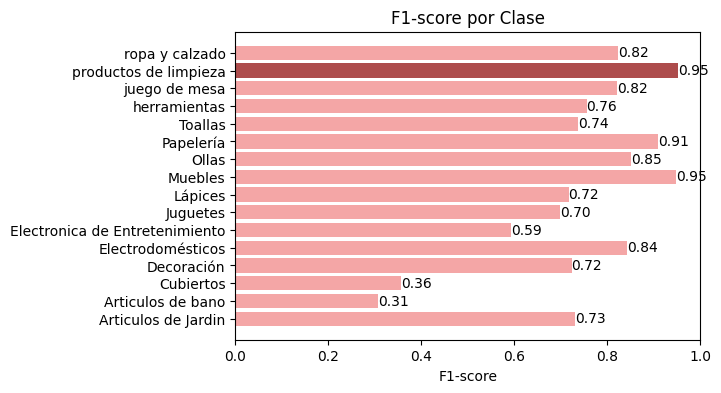

In [ ]:
plot_loss_accuracy(history_MobileNetV2)
plot_confusion_matrix(model_MobileNetV2, X_test, y_test_one_hot, class_names_list)
plot_classification_metrics(model_MobileNetV2, X_test, y_test_one_hot, class_names_list)

## 3. DenseNet169 (ImageNet)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.optimizers import Adam

# Cargar el modelo preentrenado (Carga la red)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modificar la capa de salida para tres clases
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(0.5)(x)  # Agregar capa de Dropout
x = layers.Dense(512, activation='relu')(x)  # Agregar capa densa
x = layers.Dense(1024, activation='relu')(x)  # Agregar capa densa
x = layers.Dropout(0.5)(x)  # Agregar otra capa de Dropout
x = layers.Dense(len(class_names), activation='softmax')(x)

model_DenseNet169 = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo

optimizer = Adam(learning_rate=0.0001)
#optimizer = Adam()
model_DenseNet169.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en tus datos
history_DenseNet169 = model_DenseNet169.fit(train_ds, epochs=30, verbose=1, validation_data=test_ds, callbacks=[Early_Stopping], class_weight=pesos_clases_dict)

# Evaluar el rendimiento del modelo
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot, verbose=2)
print(f'Accuracy: {test_acc}')


51877672/51877672 [==============================] - 2s 0us/step
Epoch 1/30
23/23 [==============================] - 83s 473ms/step - loss: 2.8520 - accuracy: 0.1063 - val_loss: 2.3299 - val_accuracy: 0.3714
Epoch 2/30
23/23 [==============================] - 4s 184ms/step - loss: 2.1770 - accuracy: 0.3147 - val_loss: 1.9044 - val_accuracy: 0.6317
Epoch 3/30
23/23 [==============================] - 4s 182ms/step - loss: 1.6362 - accuracy: 0.5545 - val_loss: 1.3617 - val_accuracy: 0.7587
Epoch 4/30
23/23 [==============================] - 4s 181ms/step - loss: 1.0487 - accuracy: 0.7343 - val_loss: 0.9247 - val_accuracy: 0.8063
Epoch 5/30
23/23 [==============================] - 4s 183ms/step - loss: 0.6376 - accuracy: 0.8501 - val_loss: 0.6705 - val_accuracy: 0.8444
Epoch 6/30
23/23 [==============================] - 4s 181ms/step - loss: 0.3816 - accuracy: 0.9169 - val_loss: 0.5086 - val_accuracy: 0.8571
Epoch 7/30
23/23 [==============================] - 4s 181ms/step - loss: 0.2294 -

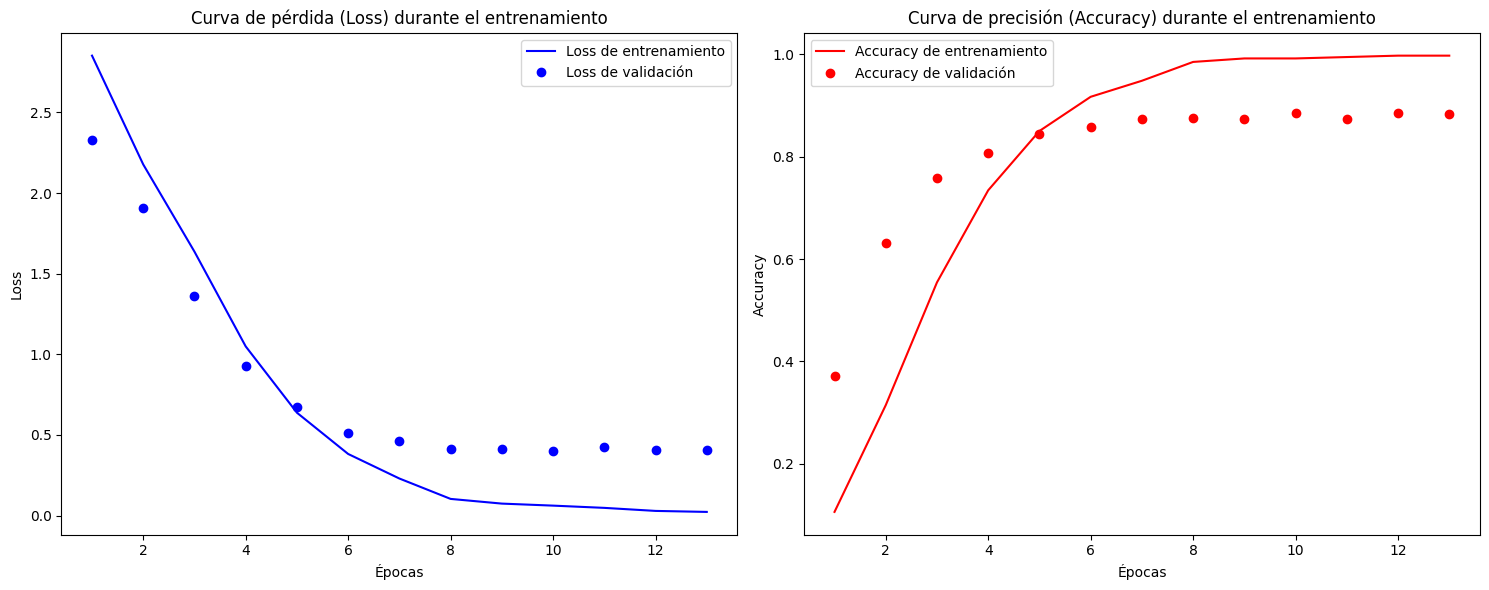

10/10 [==============================] - 3s 44ms/step


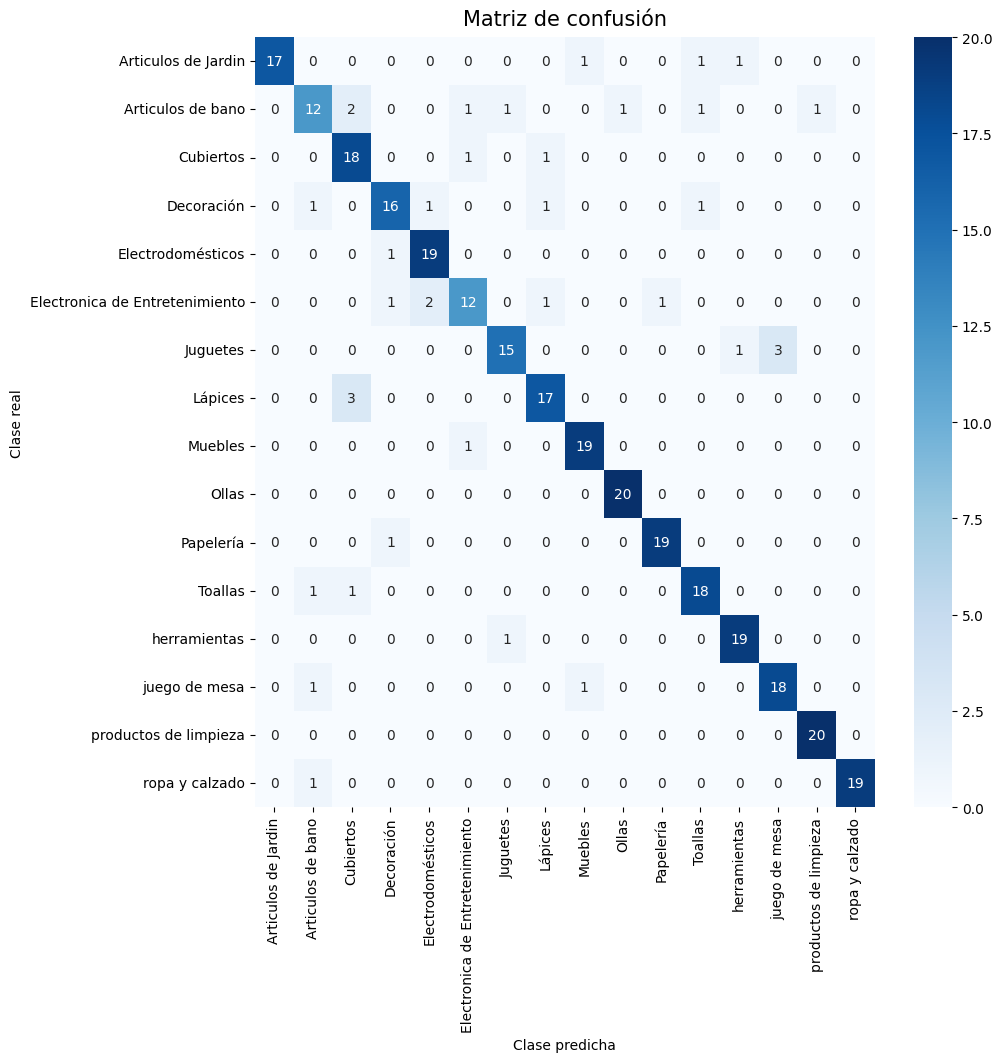

10/10 [==============================] - 0s 42ms/step


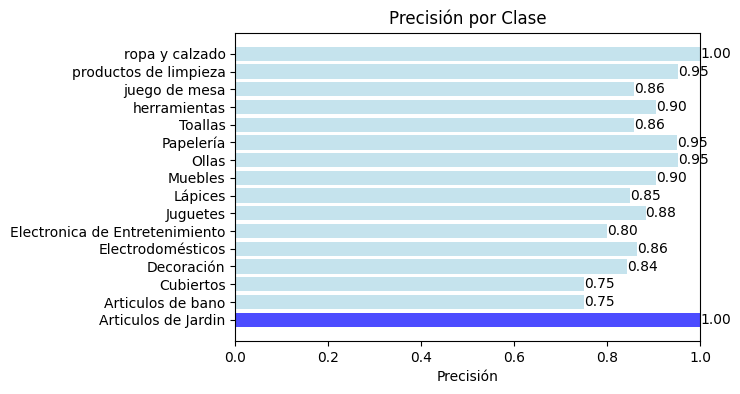

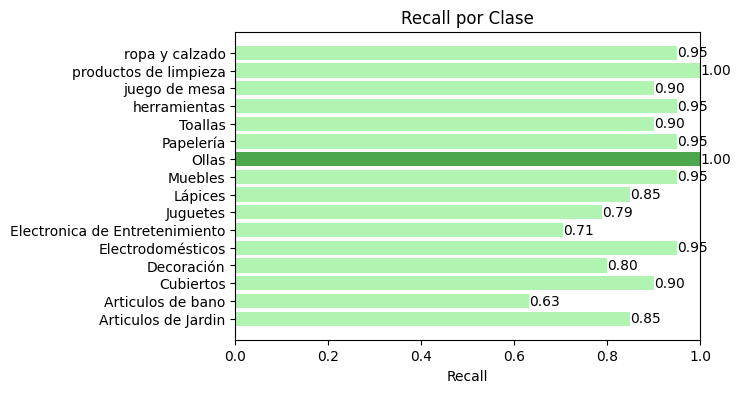

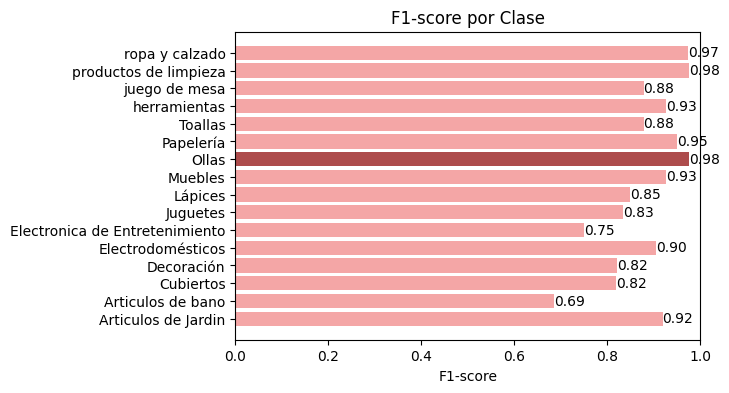

In [ ]:
plot_loss_accuracy(history_DenseNet169)
plot_confusion_matrix(model_DenseNet169, X_test, y_test_one_hot, class_names_list)
plot_classification_metrics(model_DenseNet169, X_test, y_test_one_hot, class_names_list)

## 4. VGG19 (ImageNet)
 VGG19 es un modelo que se destacó en competencias de clasificación de imágenes. Puedes cargarlo y personalizar la capa de salida según tus necesidades.

In [ ]:

Early_Stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,              # El entrenamiento se detendrá después de 4 épocas sin mejora.
    verbose=1                # Mostrar mensajes de registro para el progreso del entrenamiento.
)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19

# Cargar el modelo preentrenado (Carga la red)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modificar la capa de salida para tres clases
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(0.3)(x)  # Agregar capa de Dropout
x = layers.Dense(512, activation='relu')(x)  # Agregar capa densa
x = layers.Dense(1024, activation='relu')(x)  # Agregar capa densa
x = layers.Dropout(0.5)(x)  # Agregar otra capa de Dropout
x = layers.Dense(len(class_names), activation='softmax')(x)

model_VGG19 = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo

optimizer = Adam(learning_rate=0.00001)
#optimizer = Adam()
model_VGG19.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en tus datos
history_VGG19 = model_VGG19.fit(train_ds, epochs=100, verbose=1, validation_data=test_ds, callbacks=[Early_Stopping], class_weight=pesos_clases_dict)

# Evaluar el rendimiento del modelo
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot, verbose=2)
print(f'Accuracy: {test_acc}')


80134624/80134624 [==============================] - 3s 0us/step
Epoch 1/100
23/23 [==============================] - 16s 359ms/step - loss: 2.8587 - accuracy: 0.0572 - val_loss: 2.7523 - val_accuracy: 0.1429
Epoch 2/100
23/23 [==============================] - 4s 168ms/step - loss: 2.7869 - accuracy: 0.0790 - val_loss: 2.6768 - val_accuracy: 0.2730
Epoch 3/100
23/23 [==============================] - 4s 169ms/step - loss: 2.6902 - accuracy: 0.1267 - val_loss: 2.5044 - val_accuracy: 0.3556
Epoch 4/100
23/23 [==============================] - 4s 169ms/step - loss: 2.5834 - accuracy: 0.1839 - val_loss: 2.2894 - val_accuracy: 0.4317
Epoch 5/100
23/23 [==============================] - 4s 169ms/step - loss: 2.3845 - accuracy: 0.2452 - val_loss: 2.0240 - val_accuracy: 0.5333
Epoch 6/100
23/23 [==============================] - 4s 169ms/step - loss: 2.2264 - accuracy: 0.3052 - val_loss: 1.8484 - val_accuracy: 0.5175
Epoch 7/100
23/23 [==============================] - 4s 169ms/step - loss: 1

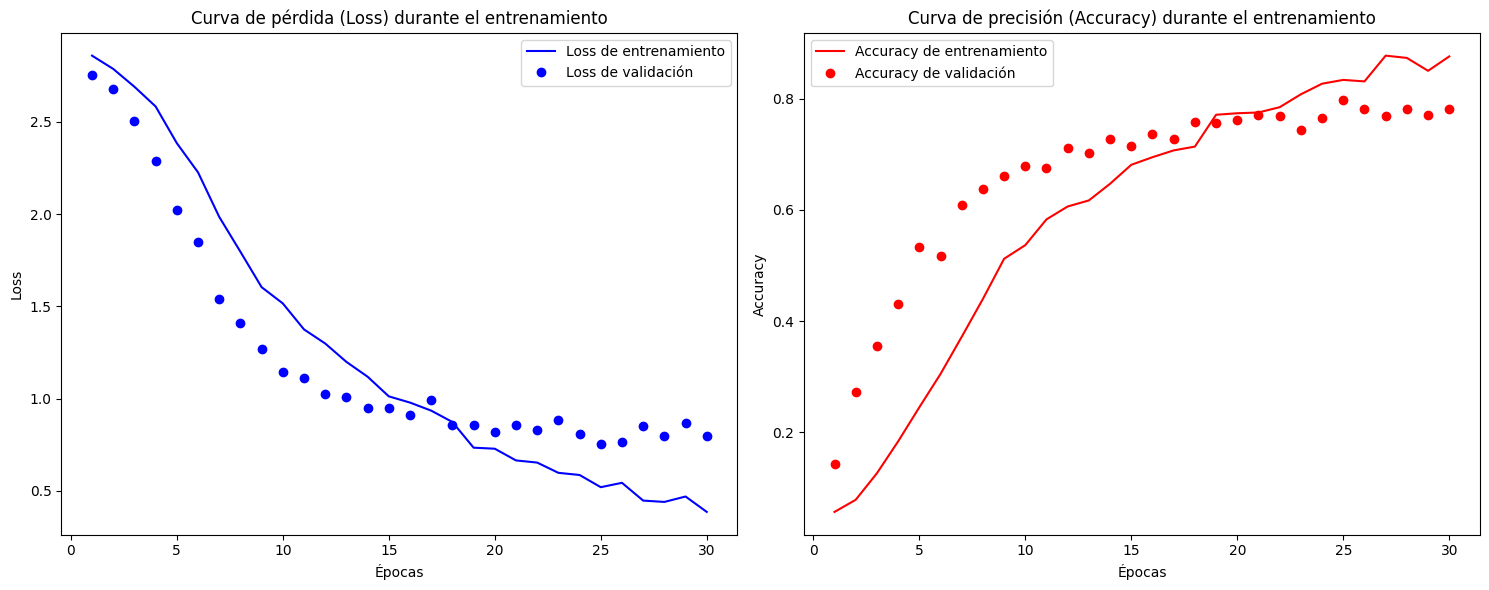

10/10 [==============================] - 1s 46ms/step


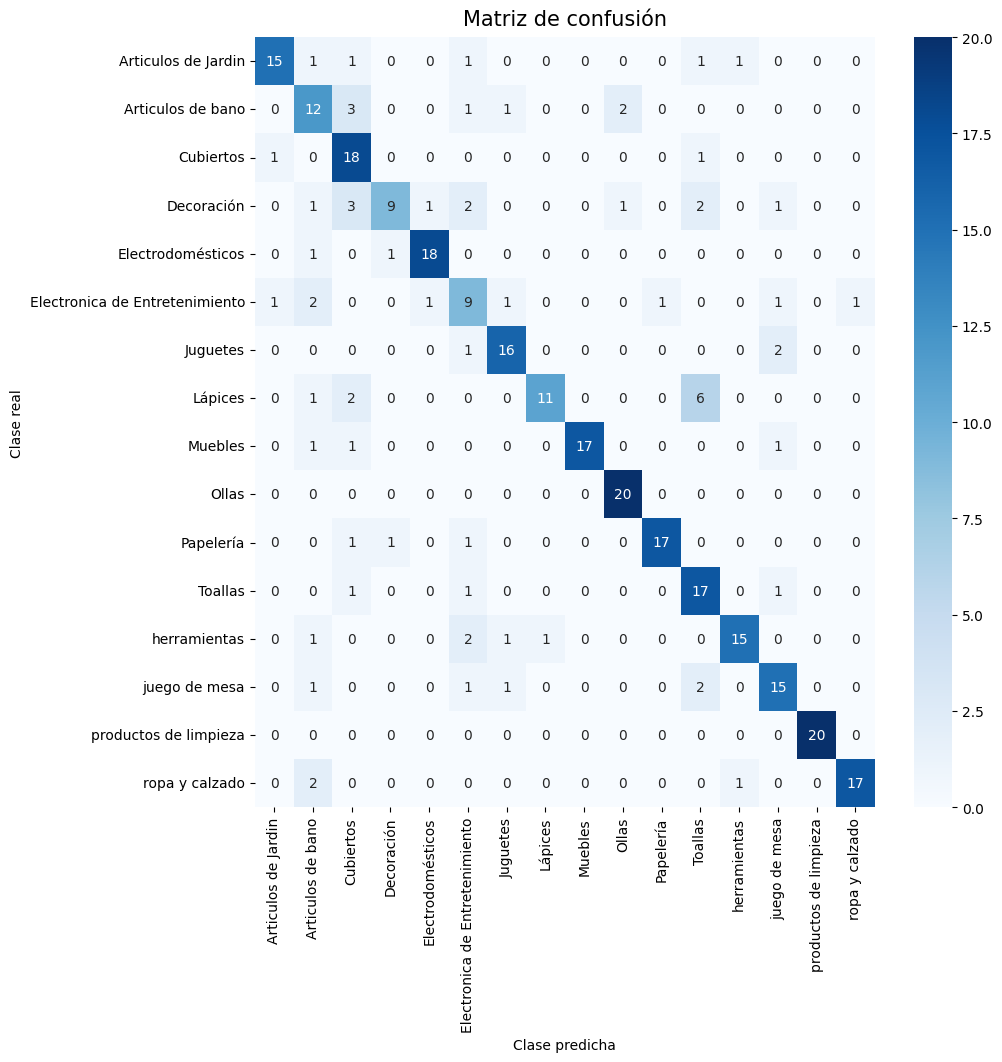

10/10 [==============================] - 0s 46ms/step


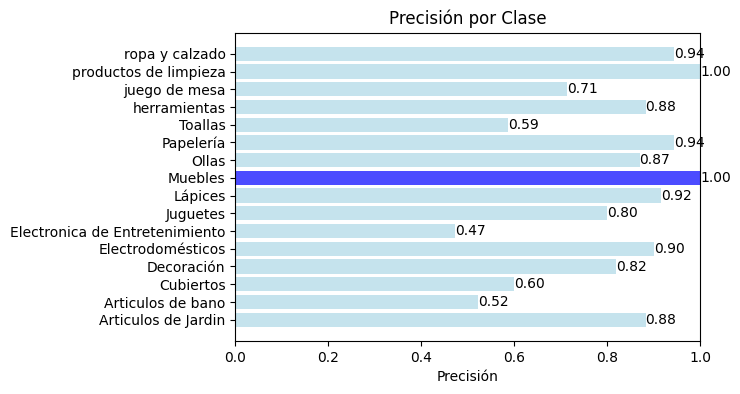

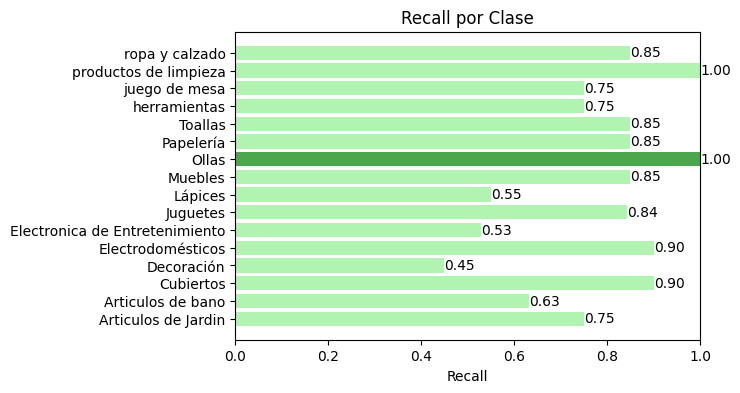

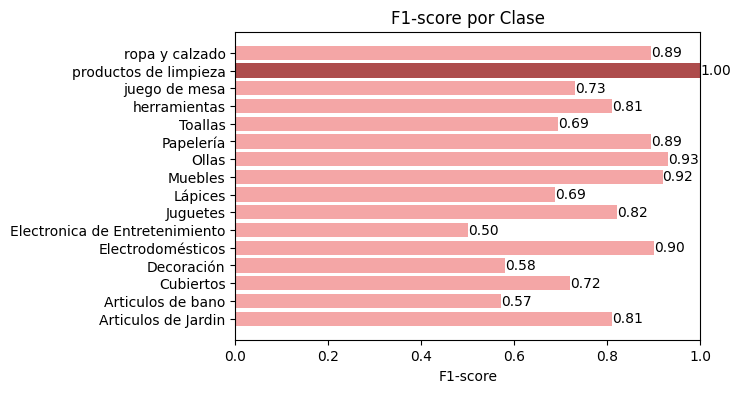

In [ ]:
plot_loss_accuracy(history_VGG19)
plot_confusion_matrix(model_VGG19, X_test, y_test_one_hot, class_names_list)
plot_classification_metrics(model_VGG19, X_test, y_test_one_hot, class_names_list)

## 5. InceptionV3 (ImageNet)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam

# Cargar el modelo preentrenado (Carga la red)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modificar la capa de salida para tres clases
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(0.5)(x)  # Agregar capa de Dropout
x = layers.Dense(512, activation='relu')(x)  # Agregar capa densa
x = layers.Dense(1024, activation='relu')(x)  # Agregar capa densa
x = layers.Dropout(0.5)(x)  # Agregar otra capa de Dropout
x = layers.Dense(len(class_names), activation='softmax')(x)

model_InceptionV3 = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo

optimizer = Adam(learning_rate=0.0001)
#optimizer = Adam()
model_InceptionV3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en tus datos
history_InceptionV3 = model_InceptionV3.fit(train_ds, epochs=100, verbose=1, validation_data=test_ds, callbacks=[Early_Stopping], class_weight=pesos_clases_dict)

# Evaluar el rendimiento del modelo
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot, verbose=2)
print(f'Accuracy: {test_acc}')


87910968/87910968 [==============================] - 4s 0us/step
Epoch 1/100
23/23 [==============================] - 34s 261ms/step - loss: 2.7895 - accuracy: 0.0981 - val_loss: 2.2473 - val_accuracy: 0.3937
Epoch 2/100
23/23 [==============================] - 2s 106ms/step - loss: 2.1837 - accuracy: 0.3869 - val_loss: 1.8641 - val_accuracy: 0.5587
Epoch 3/100
23/23 [==============================] - 2s 105ms/step - loss: 1.5397 - accuracy: 0.6308 - val_loss: 1.2077 - val_accuracy: 0.6889
Epoch 4/100
23/23 [==============================] - 2s 105ms/step - loss: 0.8417 - accuracy: 0.8420 - val_loss: 0.8519 - val_accuracy: 0.7238
Epoch 5/100
23/23 [==============================] - 2s 105ms/step - loss: 0.3500 - accuracy: 0.9414 - val_loss: 0.6957 - val_accuracy: 0.7810
Epoch 6/100
23/23 [==============================] - 2s 106ms/step - loss: 0.1393 - accuracy: 0.9850 - val_loss: 0.6488 - val_accuracy: 0.7937
Epoch 7/100
23/23 [==============================] - 2s 105ms/step - loss: 0

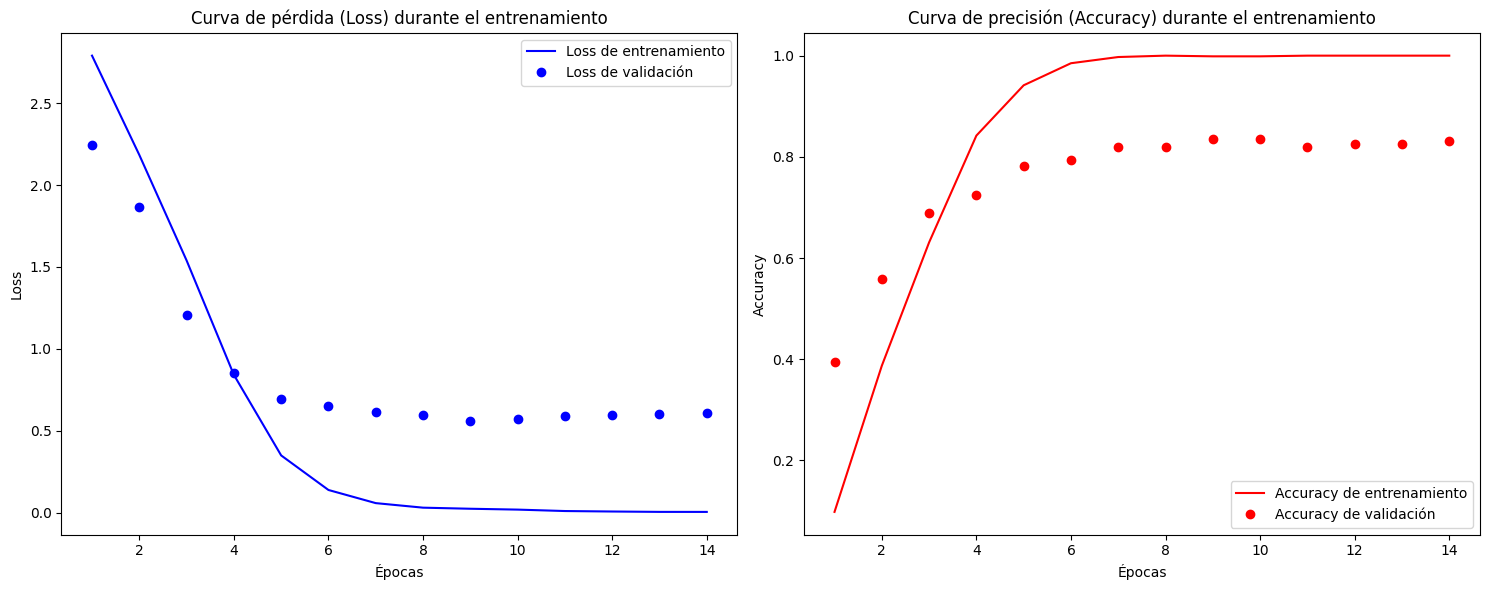

10/10 [==============================] - 1s 29ms/step


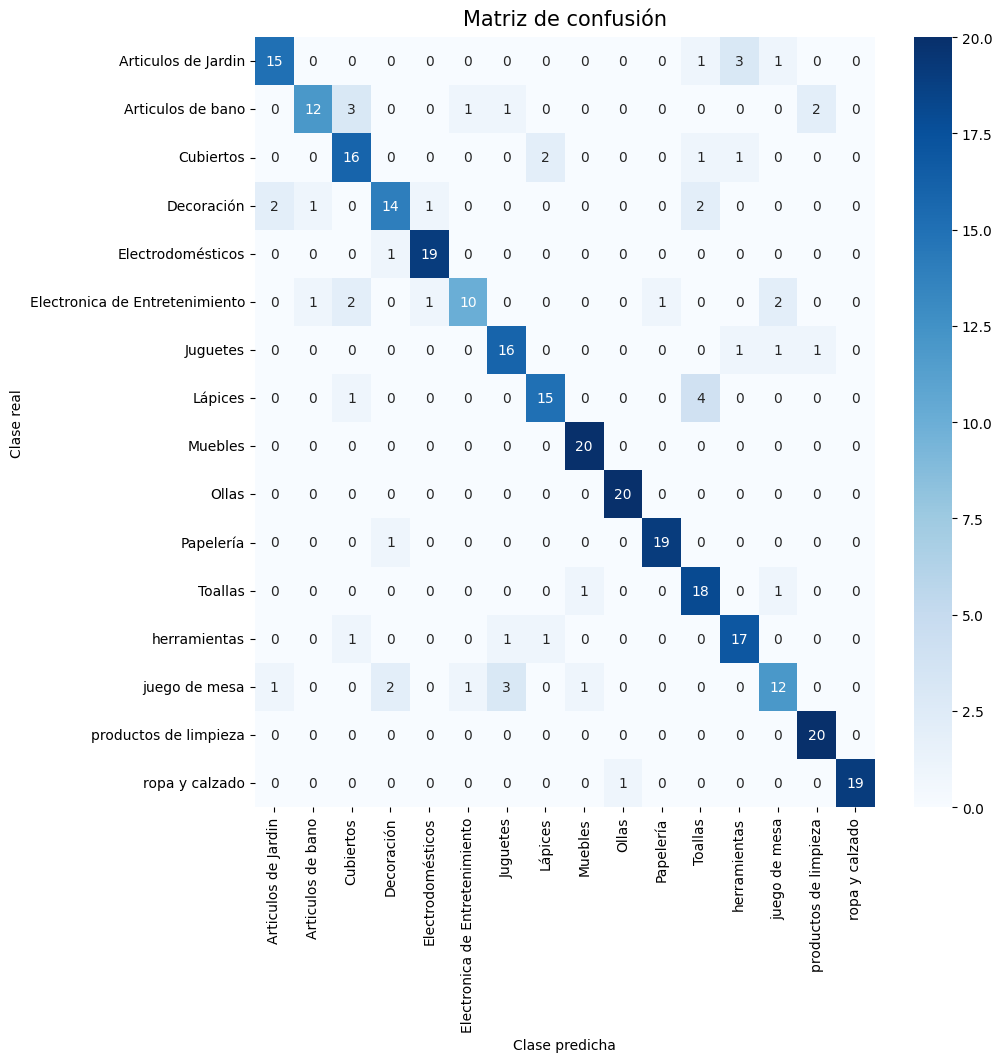

10/10 [==============================] - 0s 28ms/step


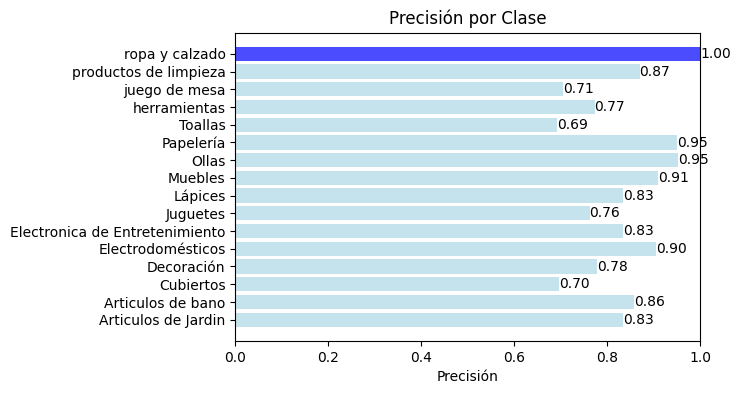

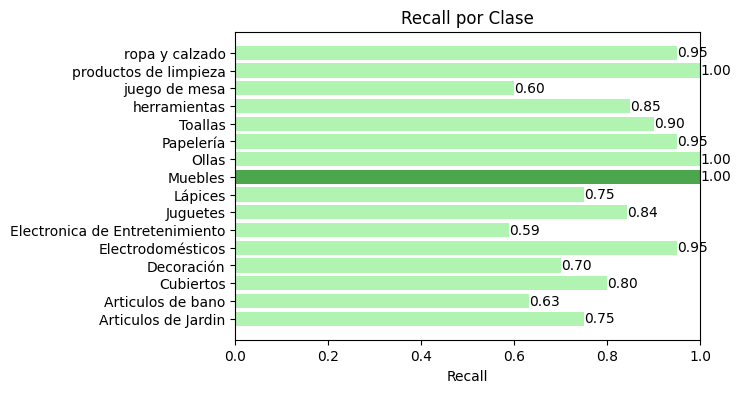

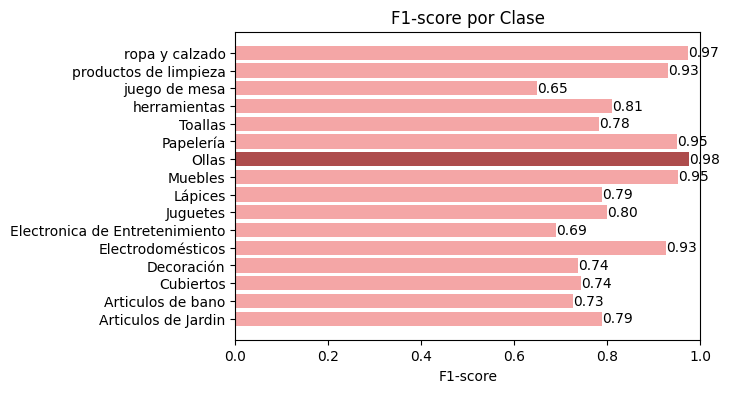

In [ ]:
plot_loss_accuracy(history_InceptionV3)
plot_confusion_matrix(model_InceptionV3, X_test, y_test_one_hot, class_names_list)
plot_classification_metrics(model_InceptionV3, X_test, y_test_one_hot, class_names_list)

## 7. ResNet50 (ImageNet)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Cargar el modelo preentrenado (Carga la red)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modificar la capa de salida para tres clases
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(0.3)(x)  # Agregar capa de Dropout
x = layers.Dense(512, activation='relu')(x)  # Agregar capa densa
x = layers.Dense(1024, activation='relu')(x)  # Agregar capa densa
x = layers.Dropout(0.3)(x)  # Agregar otra capa de Dropout
x = layers.Dense(1024, activation='relu')(x)  # Agregar capa densa
x = layers.Dropout(0.5)(x)  # Agregar otra capa de Dropout
x = layers.Dense(len(class_names), activation='softmax')(x)

model_ResNet50 = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo

optimizer = Adam(learning_rate=0.00001)
#optimizer = Adam()
model_ResNet50.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en tus datos
history_ResNet50 = model_ResNet50.fit(train_ds, epochs=100, verbose=1, validation_data=test_ds, callbacks=[Early_Stopping], class_weight=pesos_clases_dict)

# Evaluar el rendimiento del modelo
test_loss, test_acc = model_ResNet50.evaluate(X_test, y_test_one_hot, verbose=2)
print(f'Accuracy: {test_acc}')


Epoch 1/100
23/23 [==============================] - 30s 165ms/step - loss: 2.9925 - accuracy: 0.0695 - val_loss: 2.8095 - val_accuracy: 0.0698
Epoch 2/100
23/23 [==============================] - 3s 124ms/step - loss: 2.8577 - accuracy: 0.0954 - val_loss: 2.8021 - val_accuracy: 0.0857
Epoch 3/100
23/23 [==============================] - 3s 123ms/step - loss: 2.7397 - accuracy: 0.1376 - val_loss: 2.7913 - val_accuracy: 0.0381
Epoch 4/100
23/23 [==============================] - 3s 124ms/step - loss: 2.6193 - accuracy: 0.1594 - val_loss: 2.7921 - val_accuracy: 0.0381
Epoch 5/100
23/23 [==============================] - 3s 123ms/step - loss: 2.5181 - accuracy: 0.2193 - val_loss: 2.7854 - val_accuracy: 0.0603
Epoch 6/100
23/23 [==============================] - 3s 123ms/step - loss: 2.4189 - accuracy: 0.2384 - val_loss: 2.7814 - val_accuracy: 0.0889
Epoch 7/100
23/23 [==============================] - 3s 124ms/step - loss: 2.3607 - accuracy: 0.2643 - val_loss: 2.7757 - val_accuracy: 0.095

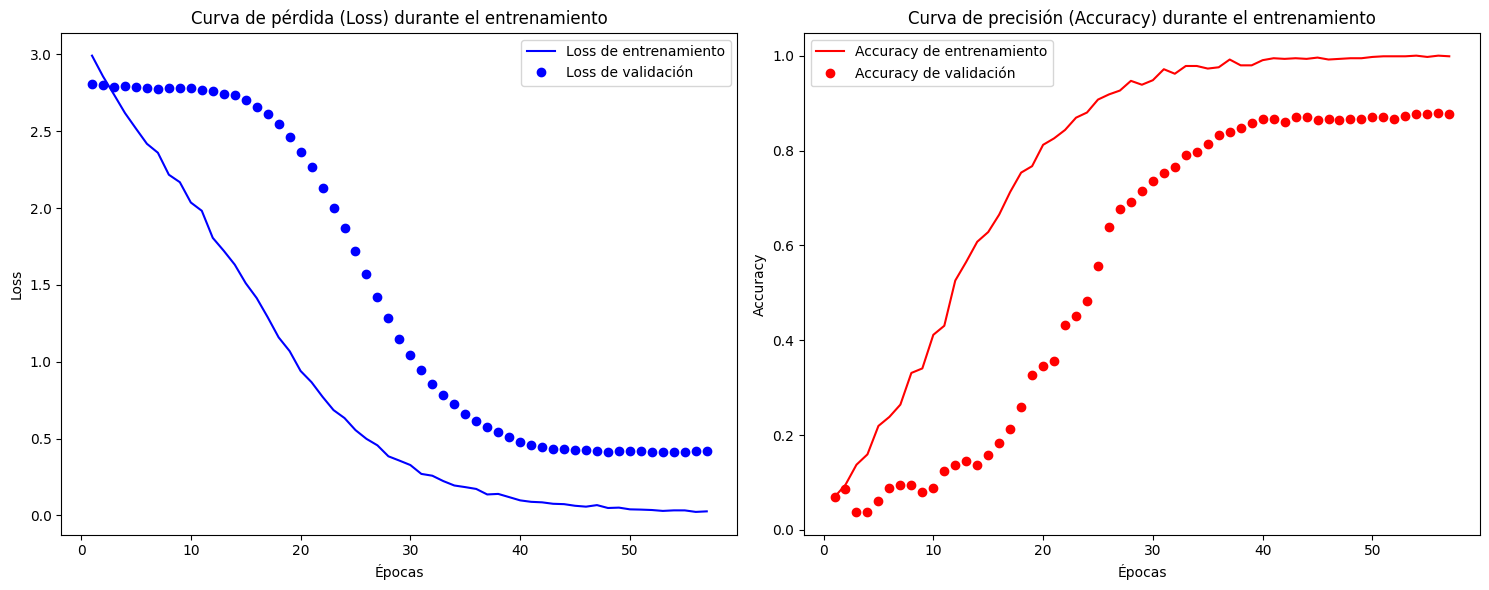

10/10 [==============================] - 1s 35ms/step


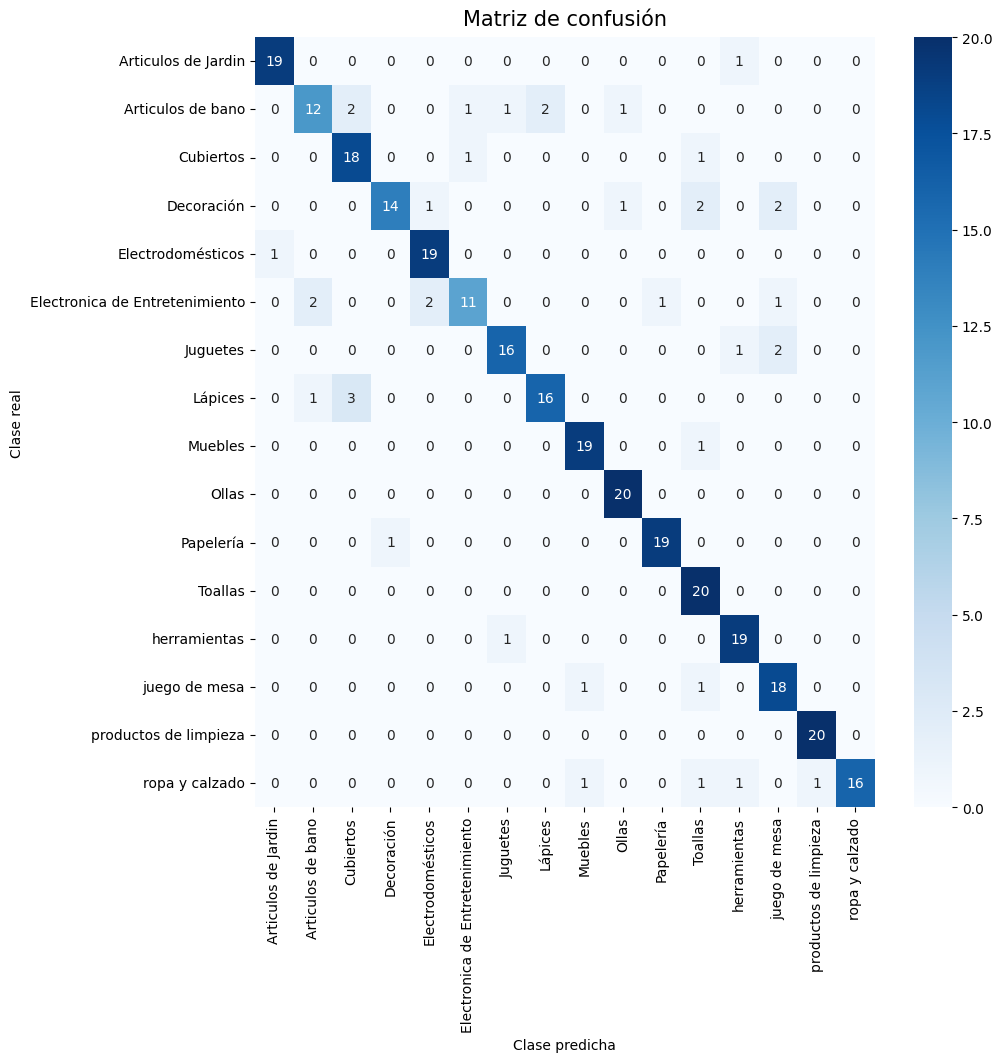

10/10 [==============================] - 0s 33ms/step


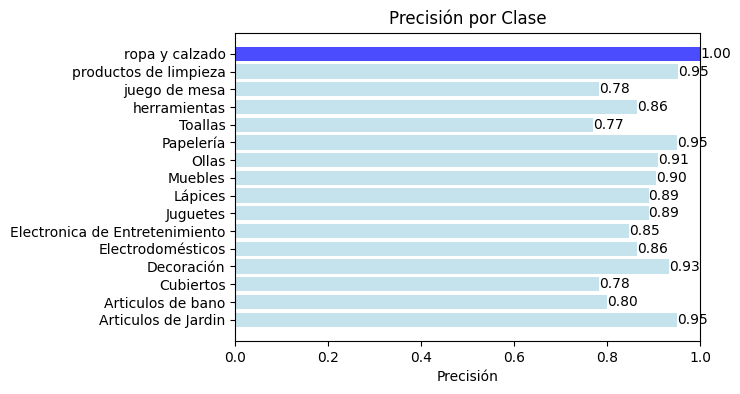

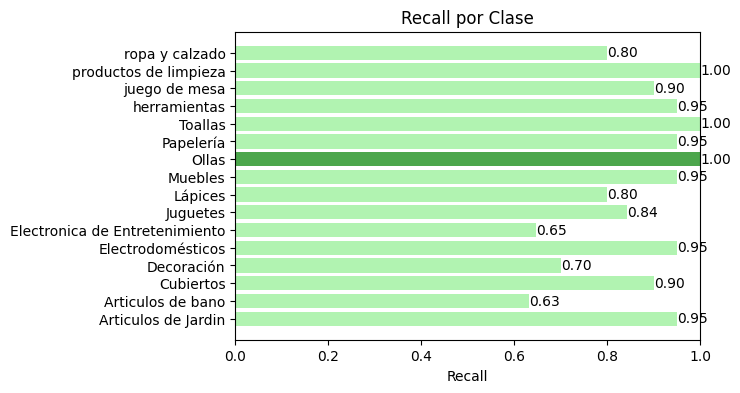

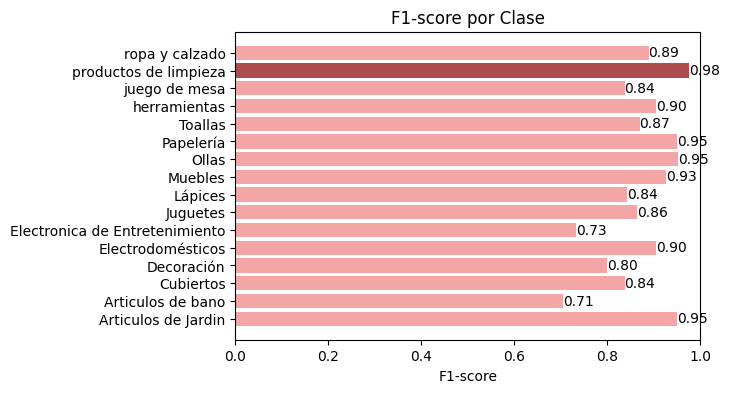

In [ ]:
plot_loss_accuracy(history_ResNet50)
plot_confusion_matrix(model_ResNet50, X_test, y_test_one_hot, class_names_list)
plot_classification_metrics(model_ResNet50, X_test, y_test_one_hot, class_names_list)

5. **Comparación de Resultados Finales:**
   - Compara los resultados obtenidos de todos los modelos, tanto el personalizado como los preentrenados.
   - Presenta un análisis final que resuma las fortalezas y debilidades de cada modelo en relación con tu conjunto de datos específico.


# Resultados de F1 score para cada entrenamiento


10/10 [==============================] - 0s 35ms/step


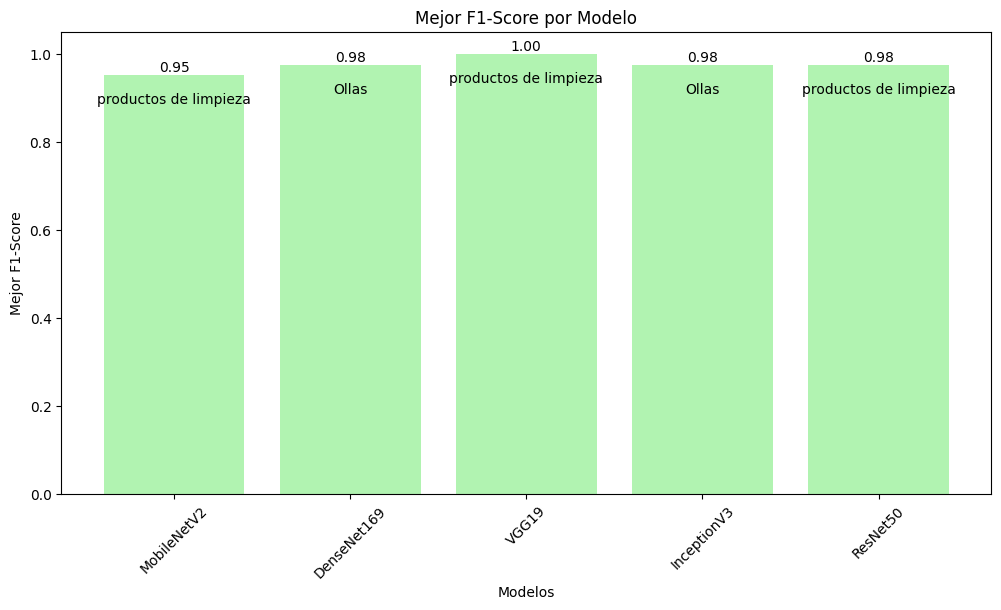

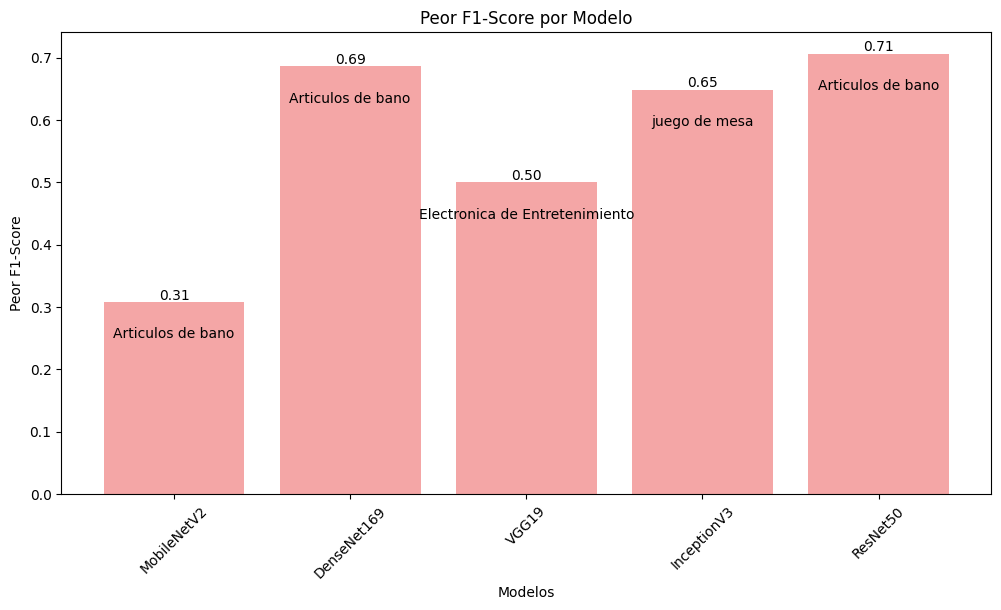

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Models = [model_MobileNetV2, model_DenseNet169, model_VGG19, model_InceptionV3, model_ResNet50]
model_names = ["MobileNetV2", "DenseNet169", "VGG19", "InceptionV3", "ResNet50"]

# Listas para almacenar los mejores y peores resultados
best_f1_scores = []
worst_f1_scores = []
best_class_names = []  # Lista para almacenar las clases con mejores F1-scores
worst_class_names = []  # Lista para almacenar las clases con peores F1-scores

# Ciclo a través de los modelos
for i, model in enumerate(Models):
    # Obtener las predicciones del modelo
    y_pred = model.predict(X_test)

    # Convertir las probabilidades en etiquetas de clase
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test_one_hot, axis=1)

    # Calcular las métricas de clasificación
    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

    # Obtener el F1-score para cada clase
    f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

    # Identificar la clase con el F1-score más alto y más bajo
    best_class_idx = np.argmax(f1_scores)
    worst_class_idx = np.argmin(f1_scores)

    best_class_name = class_names[best_class_idx]
    worst_class_name = class_names[worst_class_idx]

    best_f1_score = f1_scores[best_class_idx]
    worst_f1_score = f1_scores[worst_class_idx]

    best_f1_scores.append(best_f1_score)
    worst_f1_scores.append(worst_f1_score)
    best_class_names.append(best_class_name)
    worst_class_names.append(worst_class_name)

# Crear un gráfico de barras para los mejores F1-scores
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, best_f1_scores, color='lightgreen', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('Mejor F1-Score')
plt.title('Mejor F1-Score por Modelo')

# Agregar valores en cada barra y etiquetas de clase
for i, (bar, val, class_name) in enumerate(zip(bars, best_f1_scores, best_class_names)):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')
    plt.text(i, val - 0.04, class_name, ha='center', va='top')

plt.xticks(rotation=45)
plt.show()

# Crear un gráfico de barras para los peores F1-scores
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, worst_f1_scores, color='lightcoral', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('Peor F1-Score')
plt.title('Peor F1-Score por Modelo')

# Agregar valores en cada barra y etiquetas de clase
for i, (bar, val, class_name) in enumerate(zip(bars, worst_f1_scores, worst_class_names)):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')
    plt.text(i, val - 0.04, class_name, ha='center', va='top')

plt.xticks(rotation=45)
plt.show()


Si bien todos los modelos pre entrenados tienen mejor predictibilidad que el modelo original, presentar resultados variados, siendo DenseNet169 y ResNet50 los que presentan las clases con mayor F1-Score.

## Resultados de entrenamiento de cada modelo pre entrenado.

Último valor de pérdida de validación para MobileNetV2: 0.8836
Último valor de precisión de validación para MobileNetV2: 0.7556

Último valor de pérdida de validación para DenseNet169: 0.4071
Último valor de precisión de validación para DenseNet169: 0.8825

Último valor de pérdida de validación para VGG19: 0.7965
Último valor de precisión de validación para VGG19: 0.7810

Último valor de pérdida de validación para InceptionV3: 0.6092
Último valor de precisión de validación para InceptionV3: 0.8317

Último valor de pérdida de validación para ResNet50: 0.4208
Último valor de precisión de validación para ResNet50: 0.8762



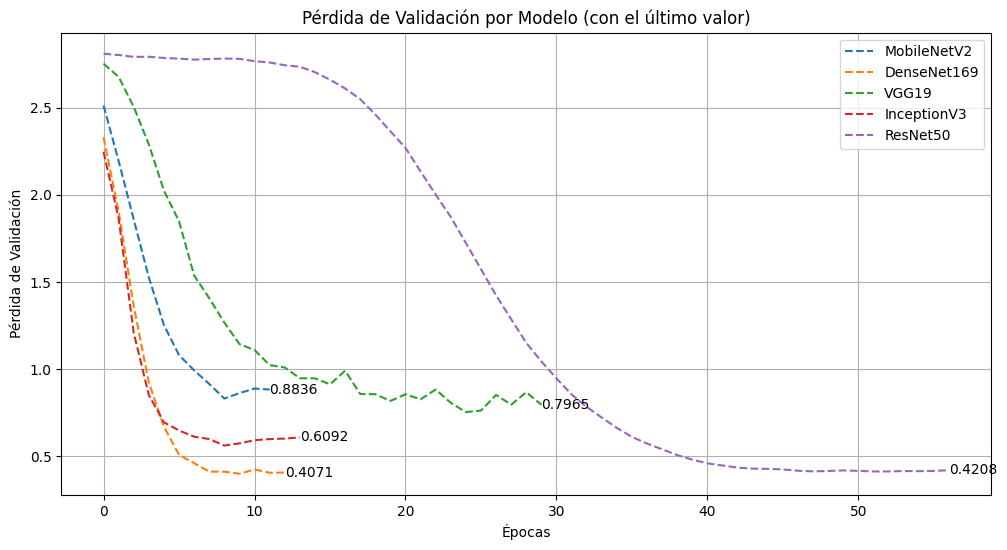

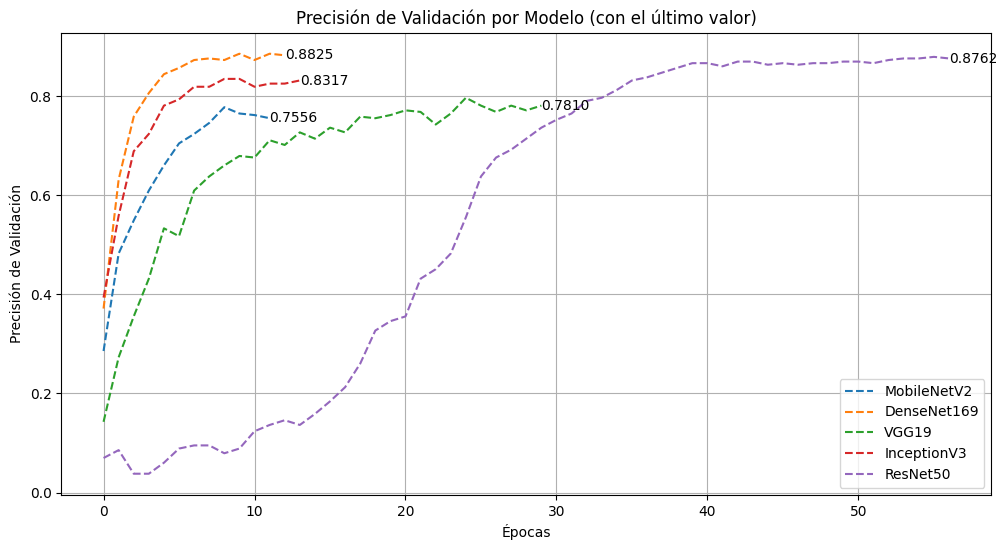

In [ ]:
import matplotlib.pyplot as plt

historys = [history_MobileNetV2, history_DenseNet169, history_VGG19, history_InceptionV3, history_ResNet50]

# Listas para almacenar las curvas de pérdida y precisión de validación
val_losses = []
val_accuracies = []

# Ciclo a través de los historiales
for i, history in enumerate(historys):
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    # Agregar el último valor de pérdida y precisión de validación
    last_val_loss = val_loss[-1]
    last_val_accuracy = val_accuracy[-1]

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Imprimir el último valor de pérdida y precisión de validación para cada modelo
    print(f"Último valor de pérdida de validación para {model_names[i]}: {last_val_loss:.4f}")
    print(f"Último valor de precisión de validación para {model_names[i]}: {last_val_accuracy:.4f}")
    print()

# Crear gráficos de pérdida de validación con el último valor
plt.figure(figsize=(12, 6))
for i in range(len(Models)):
    plt.plot(val_losses[i], label=f'{model_names[i]}', linestyle='--')
    last_loss = val_losses[i][-1]
    plt.text(len(val_losses[i]) - 1, last_loss, f'{last_loss:.4f}', ha='left', va='center')

plt.xlabel('Épocas')
plt.ylabel('Pérdida de Validación')
plt.title('Pérdida de Validación por Modelo (con el último valor)')
plt.legend()
plt.grid()
plt.show()

# Crear gráficos de precisión de validación con el último valor
plt.figure(figsize=(12, 6))
for i in range(len(Models)):
    plt.plot(val_accuracies[i], label=f'{model_names[i]}', linestyle='--')
    last_accuracy = val_accuracies[i][-1]
    plt.text(len(val_accuracies[i]) - 1, last_accuracy, f'{last_accuracy:.4f}', ha='left', va='center')

plt.xlabel('Épocas')
plt.ylabel('Precisión de Validación')
plt.title('Precisión de Validación por Modelo (con el último valor)')
plt.legend()
plt.grid()
plt.show()


Si bien todos Los modelos cuentan con un entrenamiento adecuado, DenseNet169 y ResNet50 son los modelos con mejores resultados de entrenamiento para los datos de validación, tanto en su van_loss, como el van_acuraccy

# Conclusión caso no Balanceado


6. **Análisis y Conclusión:**
   

Considerando todo el caso de uso, los modelos preentrenados generaron en su mayoría mejores resultados que el modelo CNN propuesto. Los modelos DenseNet169 y ResNet50 destacaron con los mejores resultados de validación y F1-score. El modelo DenseNet169 tuvo un loss de validación de **0.3988** y un accuracy de validación de **0.8938**, con la mejor clasificación para la clase "ollas". Por otro lado, el modelo ResNet50 obtuvo un loss de validación de **0.3665** y un accuracy de validación de **0.9076**, siendo la mejor clasificación para la clase "muebles".

En relación a las recomendaciones para este caso, se sugiere mejorar la optimizacion o 'fine-tunning', de los modelos con el objetivo de obtener resultados superiores. Asimismo, es crucial mejorar la calidad del conjunto de datos original. Esto puede lograrse equilibrando la cantidad de datos, ya sea mediante programación o incorporando más imágenes al conjunto de datos.



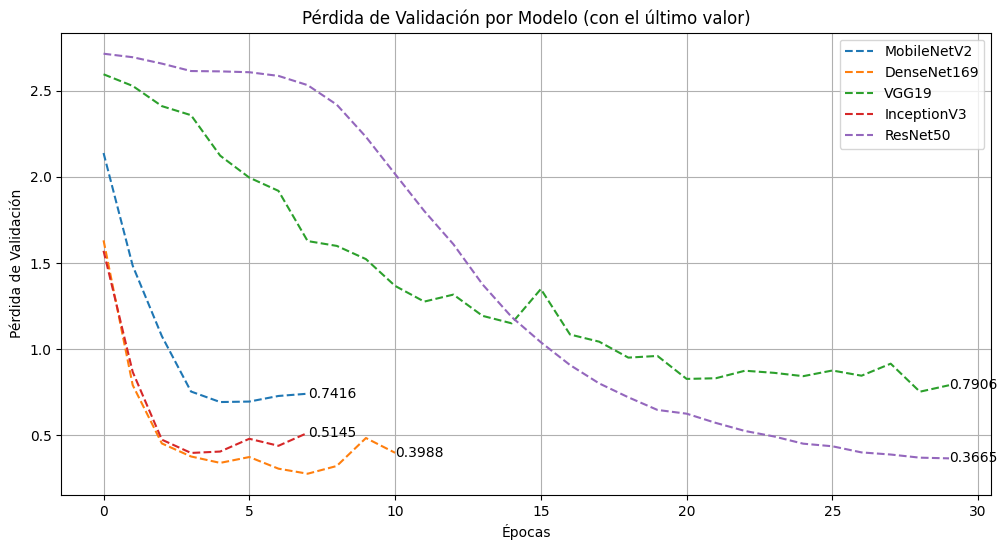

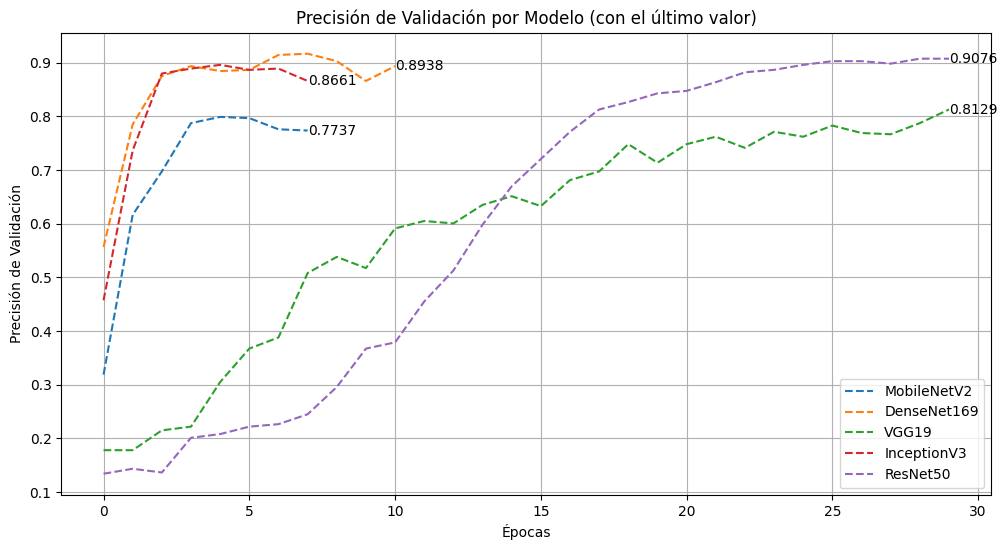

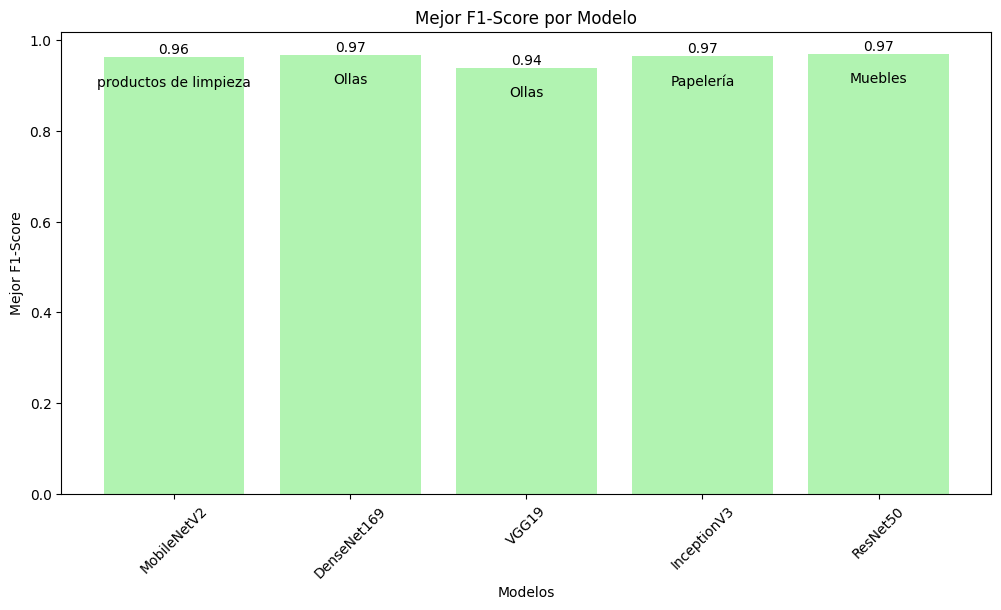

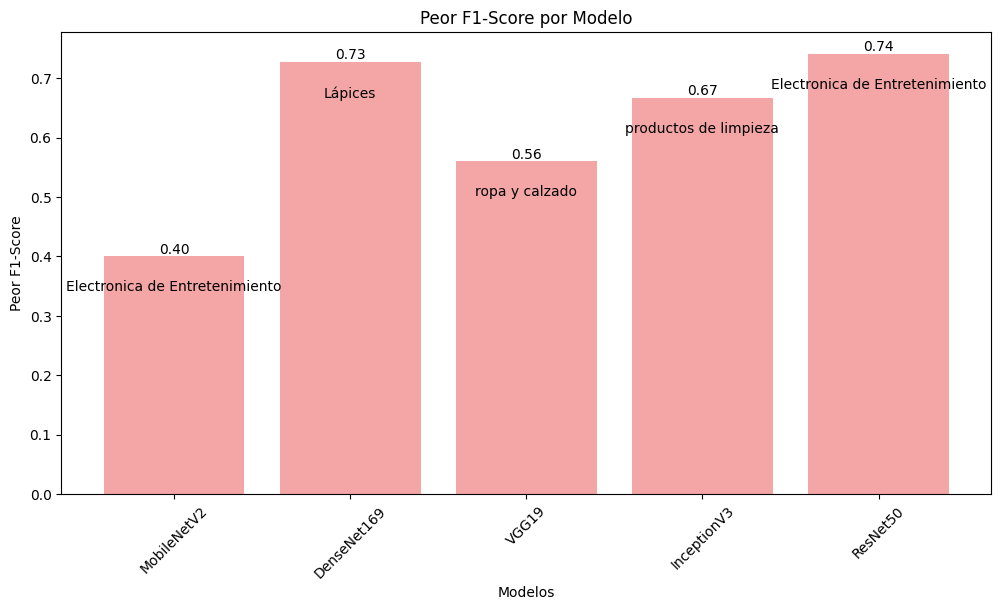


In [3]:
import pandas as pd

data = {
    "Modelo pre-entrenado": ["MobileNetV2", "DenseNet169 (1)", "VGG19", "InceptionV3", "ResNet50 (2)"],
    "val_loss": [0.7737, 0.3988, 0.7906, 0.5145, 0.3665],
    "val_acuraccy": [0.7416, 0.8938, 0.8129, 0.8661, 0.9076]
}

df = pd.DataFrame(data)

In [2]:
df

Modelo pre-entrenado  val_loss  val_acuraccy
0          MobileNetV2    0.7737        0.7416
1      DenseNet169 (1)    0.3988        0.8938
2                VGG19    0.7906        0.8129
3          InceptionV3    0.5145        0.8661
4         ResNet50 (2)    0.3665        0.9076

# Conclusión del caso con submuetreo.


6. **Análisis y Conclusión:**
   

In [6]:
import pandas as pd

data = {
    "Modelo pre-entrenado": ["MobileNetV2", "DenseNet169 (1)", "VGG19", "InceptionV3", "ResNet50 (2)"],
    "val_loss": [0.8836, 0.4071, 0.7965, 0.6092, 0.4208],
    "val_acuraccy": [0.7556, 0.8825, 0.7810, 0.8317, 0.8762]
}

df = pd.DataFrame(data)

In [10]:
import pandas as pd

data1 = {
    "Modelo pre-entrenado": ["MobileNetV2", "DenseNet169 (1)", "VGG19", "InceptionV3", "ResNet50 (2)"],
    "val_loss": [0.7737, 0.3988, 0.7906, 0.5145, 0.3665],
    "val_acuraccy": [0.7416, 0.8938, 0.8129, 0.8661, 0.9076]
}

data2 = {
    "Modelo pre-entrenado": ["MobileNetV2", "DenseNet169 (1)", "VGG19", "InceptionV3", "ResNet50 (2)"],
    "val_loss": [0.8836, 0.4071, 0.7965, 0.6092, 0.4208],
    "val_acuraccy": [0.7556, 0.8825, 0.7810, 0.8317, 0.8762]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge the two dataframes on the 'Modelo pre-entrenado' column
merged_df = pd.merge(df1, df2, on='Modelo pre-entrenado', suffixes=('_1', '_2'))

# Calculate the difference in accuracy between the two trainings
merged_df['diff_loss'] = merged_df['val_loss_2'] - merged_df['val_loss_1']
merged_df['diff_accuracy'] = merged_df['val_acuraccy_2'] - merged_df['val_acuraccy_1']

# Calculate the percentage difference in accuracy between the two trainings
merged_df['percentage_diff_loss'] = (merged_df['diff_loss'] / merged_df['val_loss_1']) * 100
merged_df['percentage_diff_accuracy'] = (merged_df['diff_accuracy'] / merged_df['val_acuraccy_1']) * 100

# Select only the columns we need
result_df = merged_df[['Modelo pre-entrenado', 'percentage_diff_loss', 'percentage_diff_accuracy']]


In [5]:
df

Modelo pre-entrenado  val_loss  val_acuraccy
0          MobileNetV2    0.8836        0.7556
1      DenseNet169 (1)    0.4071        0.8825
2                VGG19    0.7965        0.7810
3          InceptionV3    0.6092        0.8317
4         ResNet50 (2)    0.4208        0.8762

## Diferencia en puntos porcentuales de entrenamiento con submuestreo y entrenamiento original.


( - ) percentage_diff_loss == mejora

 ( + ) percentage_diff_loss == empeora


( + ) percentage_diff_accuracy == mejora

 ( - ) percentage_diff_accuracy == empeora

In [11]:
result_df

Modelo pre-entrenado  percentage_diff_loss  percentage_diff_accuracy
0          MobileNetV2             14.204472                  1.887810
1      DenseNet169 (1)              2.081244                 -1.264265
2                VGG19              0.746269                 -3.924222
3          InceptionV3             18.406220                 -3.971828
4         ResNet50 (2)             14.815825                 -3.459674

En ese caso al igual que el modelo no balanceado los modelos pre entrenados con mejores resultados fueron DenseNet169 y ResNet50 pero presentan peores resultados de validación, por tanto se recomienda revisar la calidad o cantidad de las fotos, sobre todo en las clases que siguen presentando menor F1Score.


### Conclusión general del caso.

El entrenamiento sin ningún tipo de balance en las clases presenta mejores resultados de validación, no así en la predictibilidad de sus clases (F1 score), mejorando esto último en el entrenamiento con pesos balanceados, presentado peores resultados de validación, pero mejorando la capacidad de generalización del modelo, mejorando el F1 score de todas sus clases.
Mientras que el entrenamiento con submuestreo empero en los dos aspectos antes mencionadas.